# Appliance energy prediction

## Data import

Dataset: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [2]:
df = pd.read_csv("/work/energydata_complete.csv")

## Variable description

Variable Description
====================

date time year-month-day hour:minute:second 
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chièvres weather station), in Celsius
Pressure (from Chièvres weather station), in mm Hg
RH_out, Humidity outside (from Chièvres weather station), in %
Windspeed (from Chièvres weather station), in m/s
Visibility (from Chièvres weather station), in km
Tdewpoint (from Chièvres weather station), °C
rv1, Random variable 1, nondimensional
rv2, Rnadom variable 2, nondimensional

# Data preprocessing

## Preliminary analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [5]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [6]:
min_date = df['date'].min()
max_date = df['date'].max()

print("First measurement:", min_date)
print("Last measurement:", max_date)

First measurement: 2016-01-11 17:00:00
Last measurement: 2016-05-27 18:00:00


### Checking for missing values

In [7]:
pd.DataFrame(df.isna().sum(), columns=["records missing"]).T

date  Appliances  lights  T1  RH_1  T2  RH_2  T3  RH_3  T4  \
records missing     0           0       0   0     0   0     0   0     0   0   

                 ...  T9  RH_9  T_out  Press_mm_hg  RH_out  Windspeed  \
records missing  ...   0     0      0            0       0          0   

                 Visibility  Tdewpoint  rv1  rv2  
records missing           0          0    0    0  

[1 rows x 29 columns]

## Date column format | new attributes (dayOfYear, dayOfWeek)

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['dow'] = df['date'].dt.dayofweek
df['doy'] = df['date'].dt.dayofyear
df = df.drop('date', axis =1)

In [10]:
df.head()

Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...  Tdewpoint        rv1        rv2  year  month  \
0  19.000000  45.566667  ...        5.3  13.275433  13.275433  2016      1   
1  19.000000  45.992500  ...        5.2  18.606195  18.606195  2016      1   
2  18.926667  45.890000  ...        5.1  28.642668  28.642668  2016      1   
3  18.890000  45.723333  ...        5.0  45.410389  45.410389  2016      1   
4  18.890000  45.530000  ...        4.9  10.084097  10.084097  2016      1   

   day  hour  minute  dow  doy  
0   11    17       0    0   11  
1   11    17      10    0   11  
2   11    17      20    0   11  
3   11    17      30    0   11  
4   11    17      40    0   11  

[5 rows x 35 columns]

### Energy consumption plot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


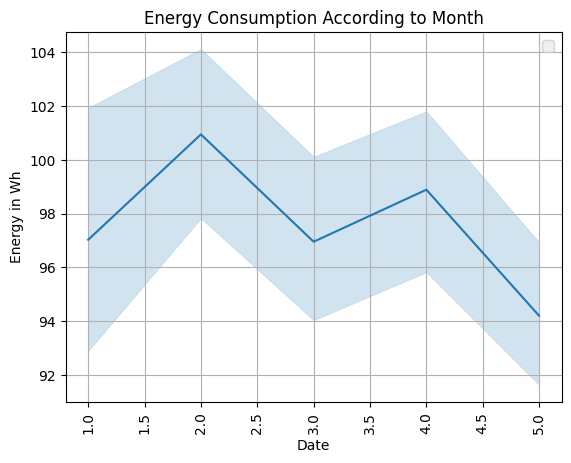

In [11]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x='month', y='Appliances', data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Date")
plt.ylabel("Energy in Wh")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Month")

plt.show()

## Outliers and Standardization

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


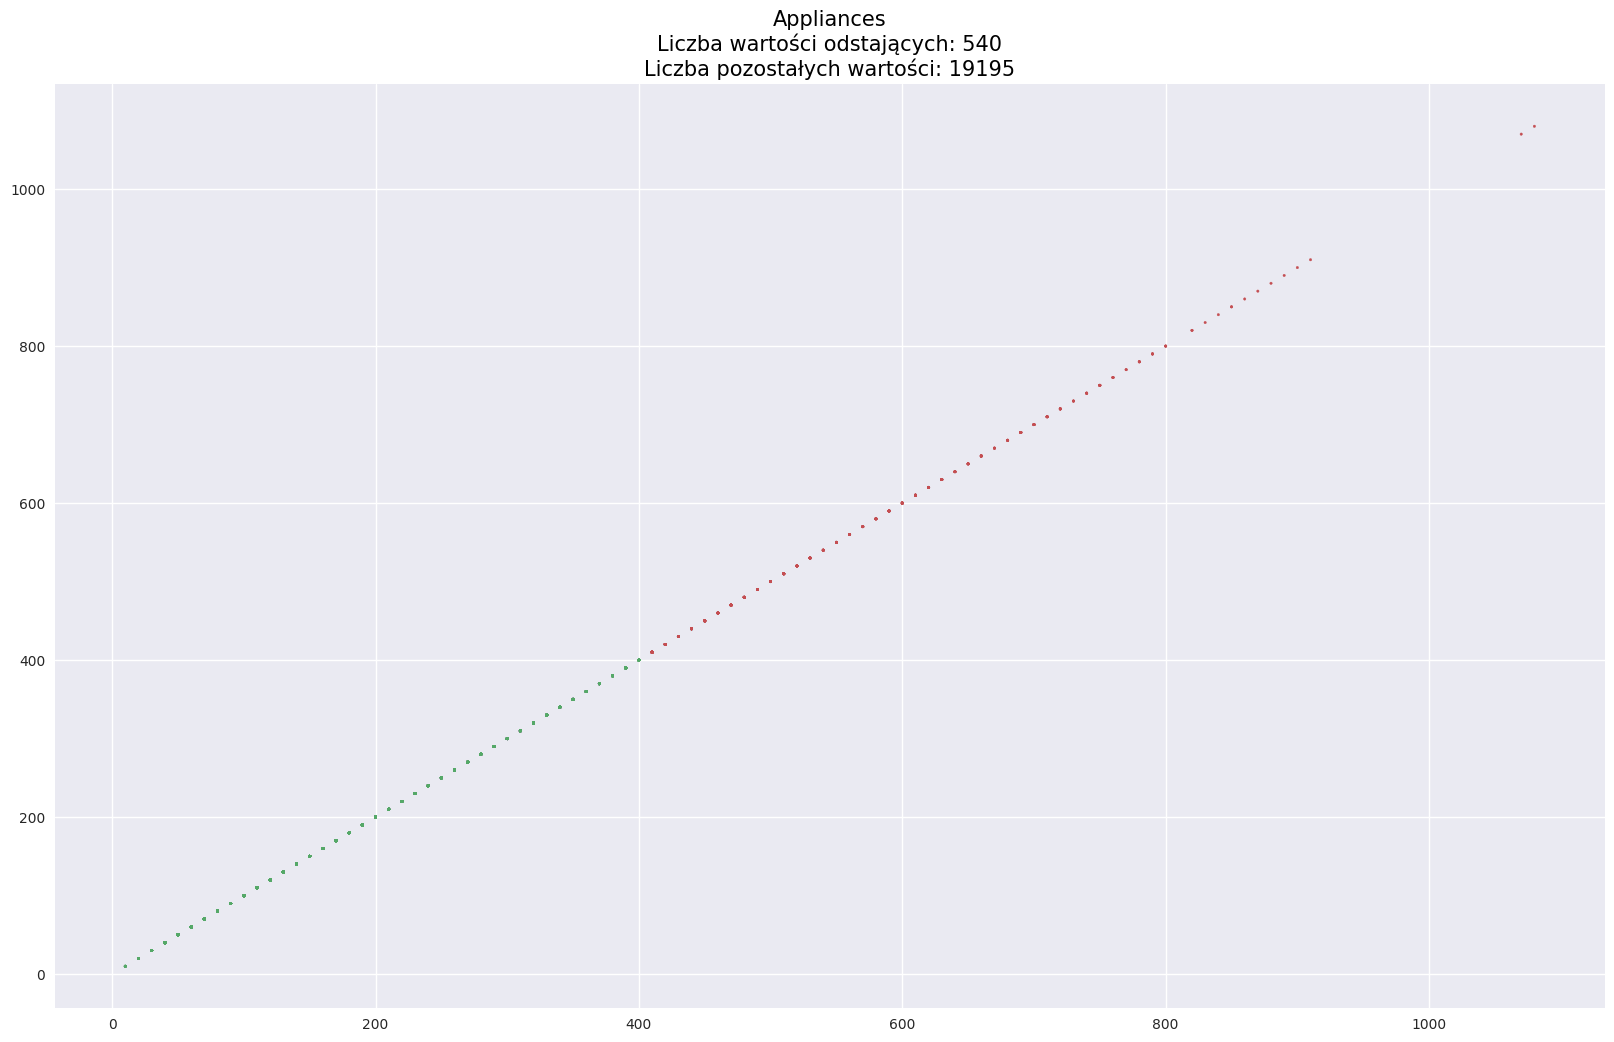

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


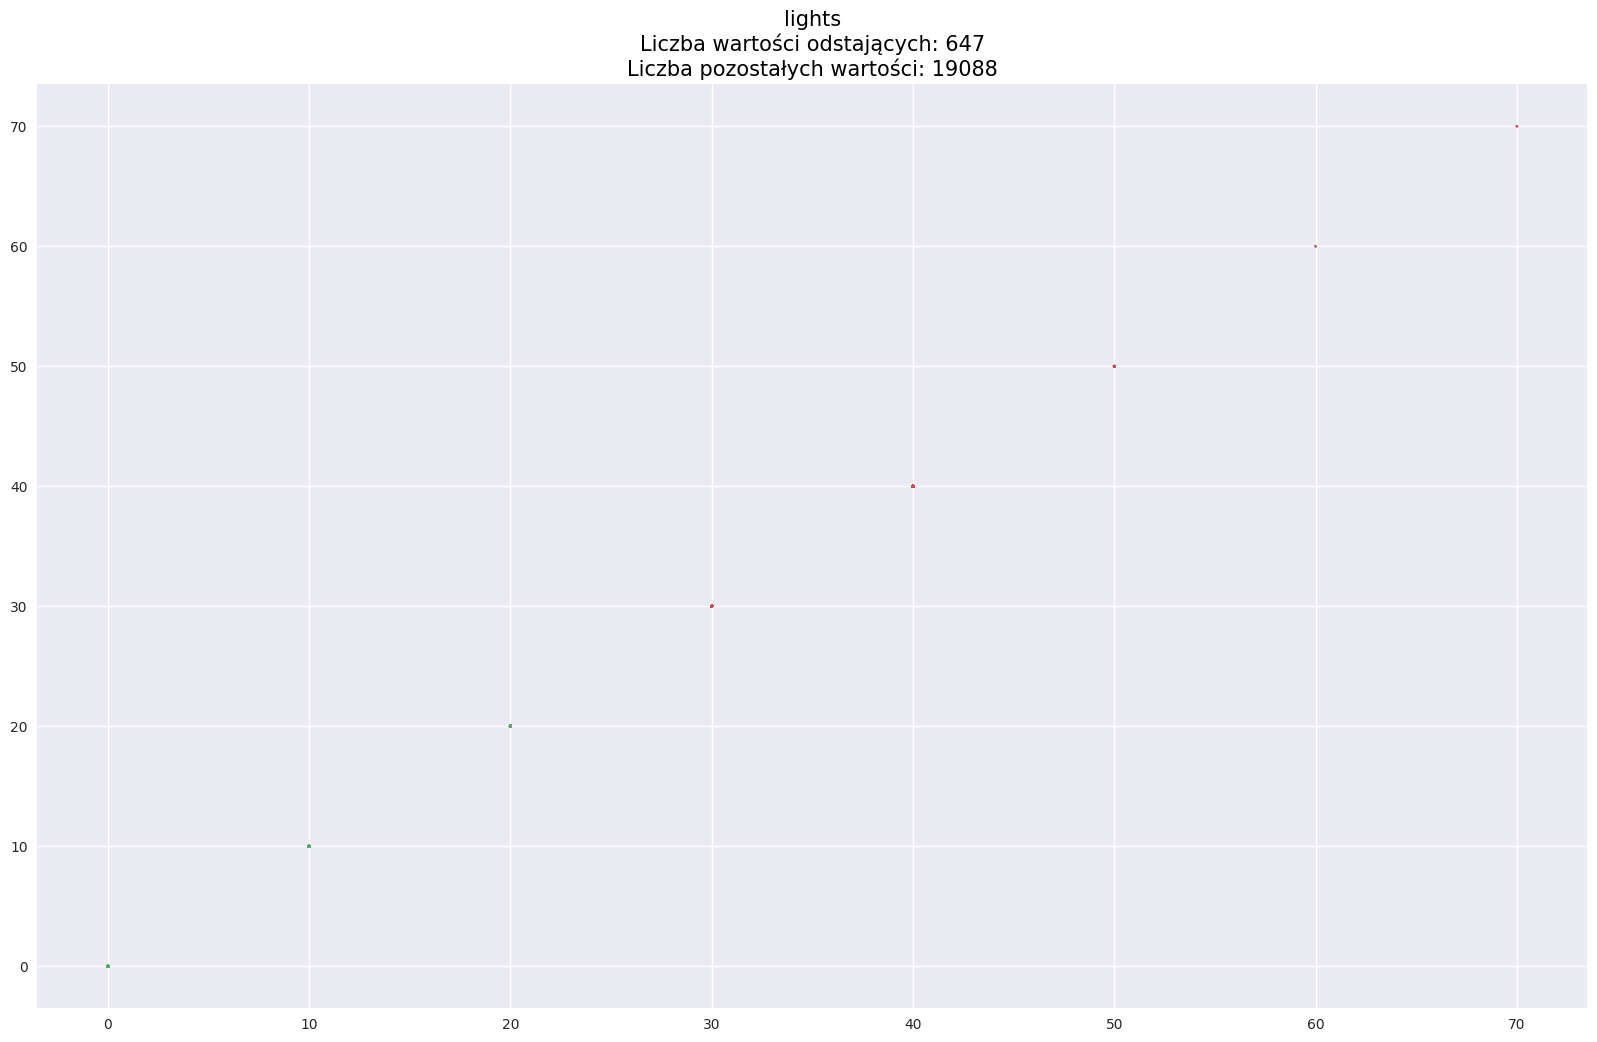

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


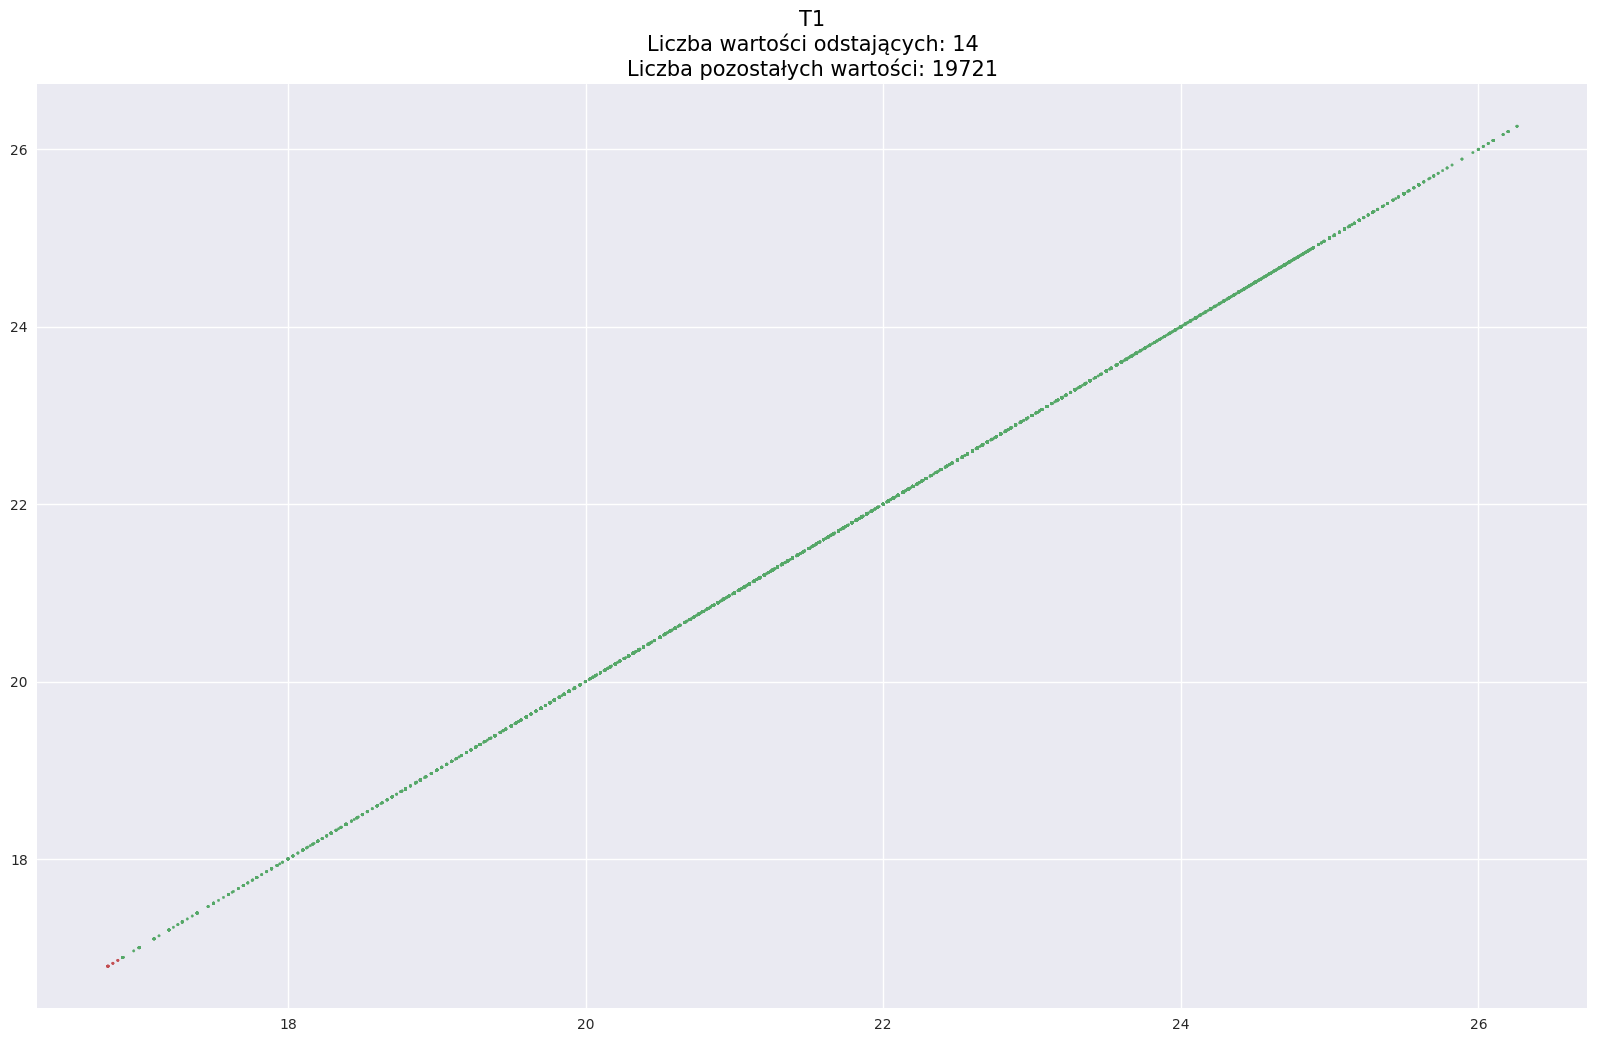

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


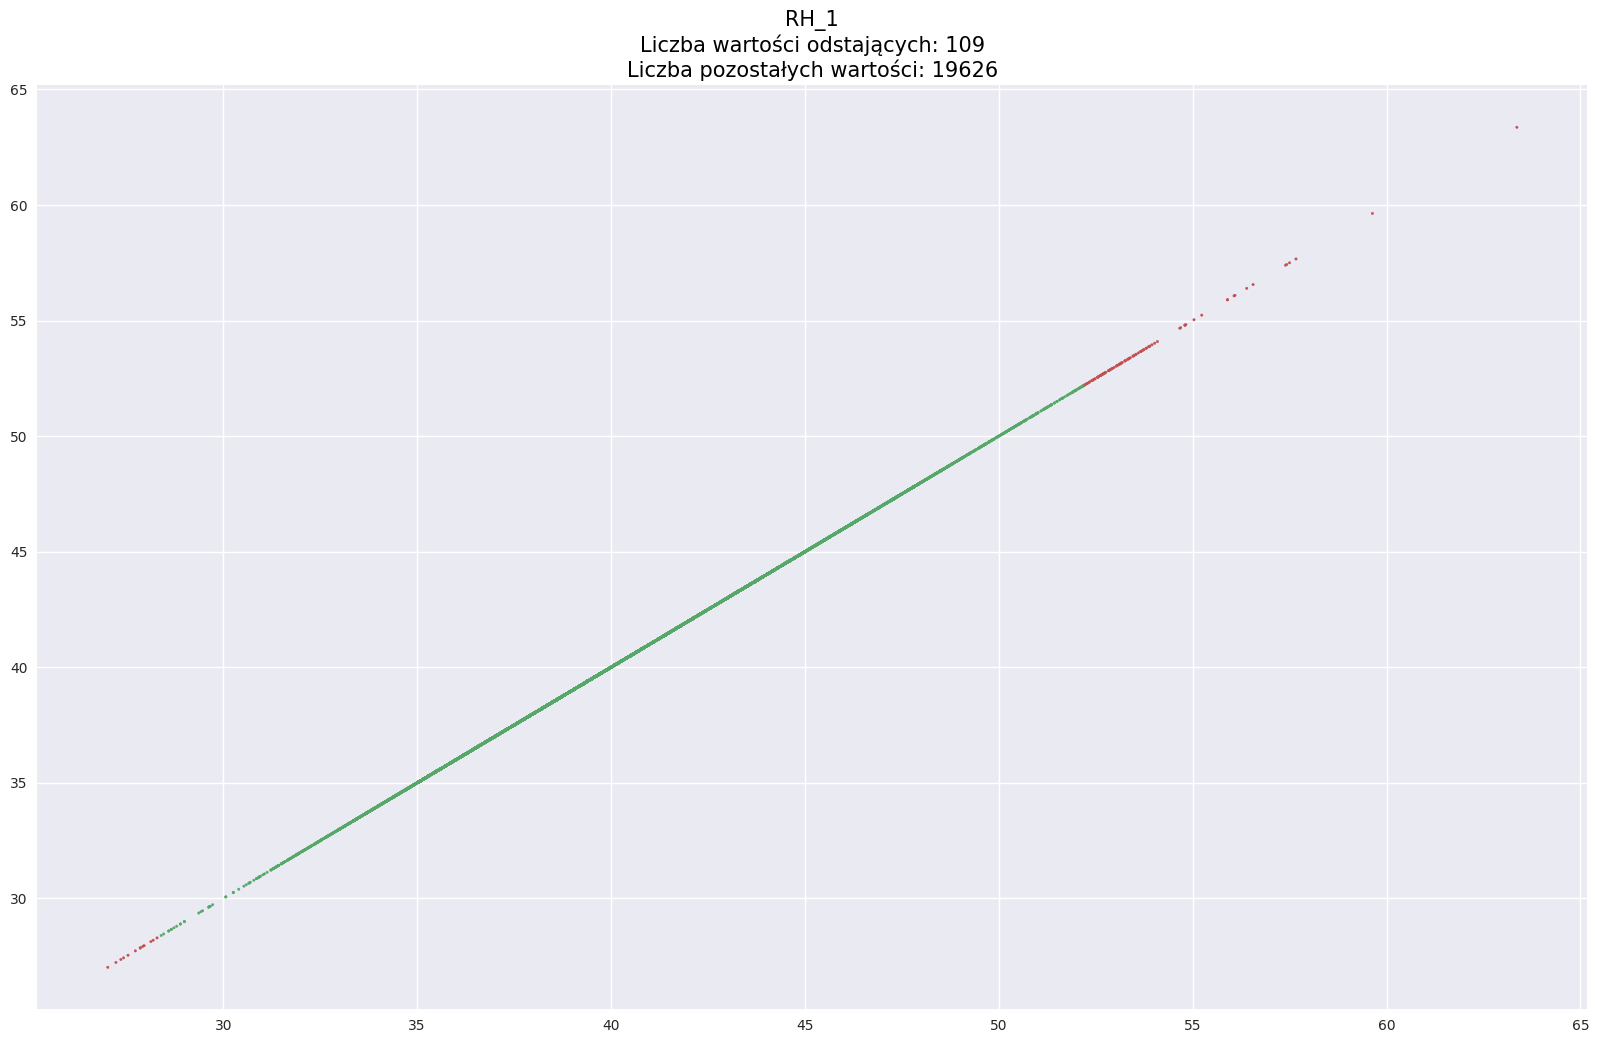

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


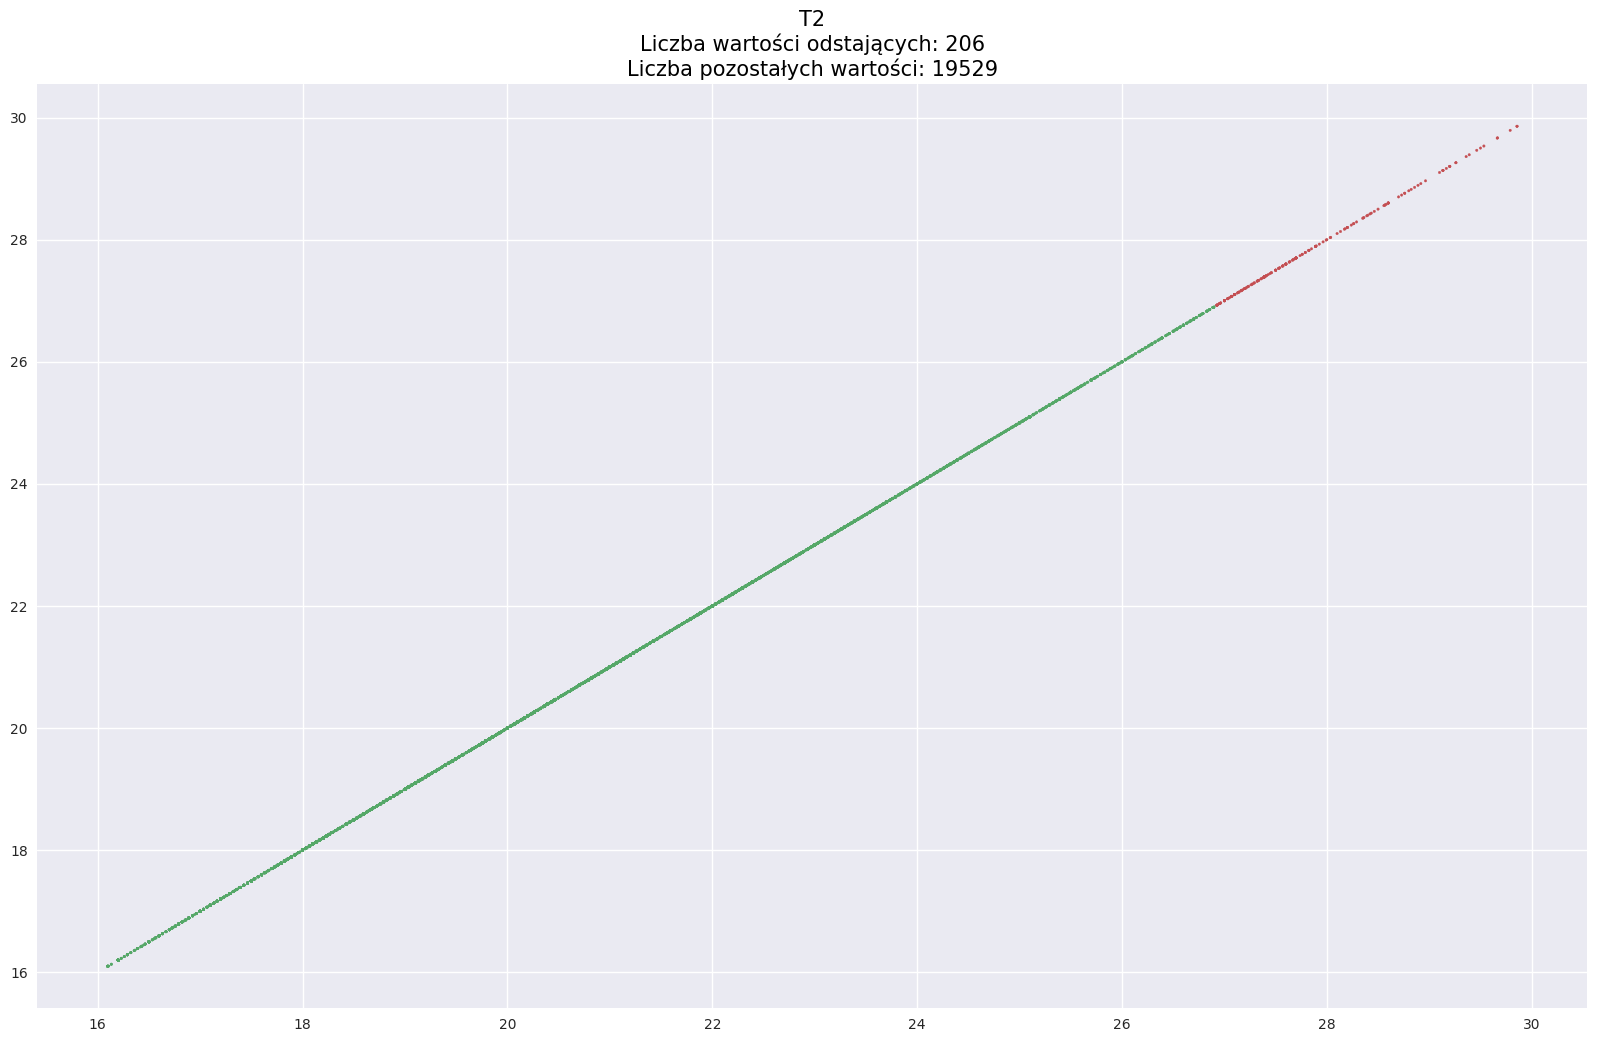

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


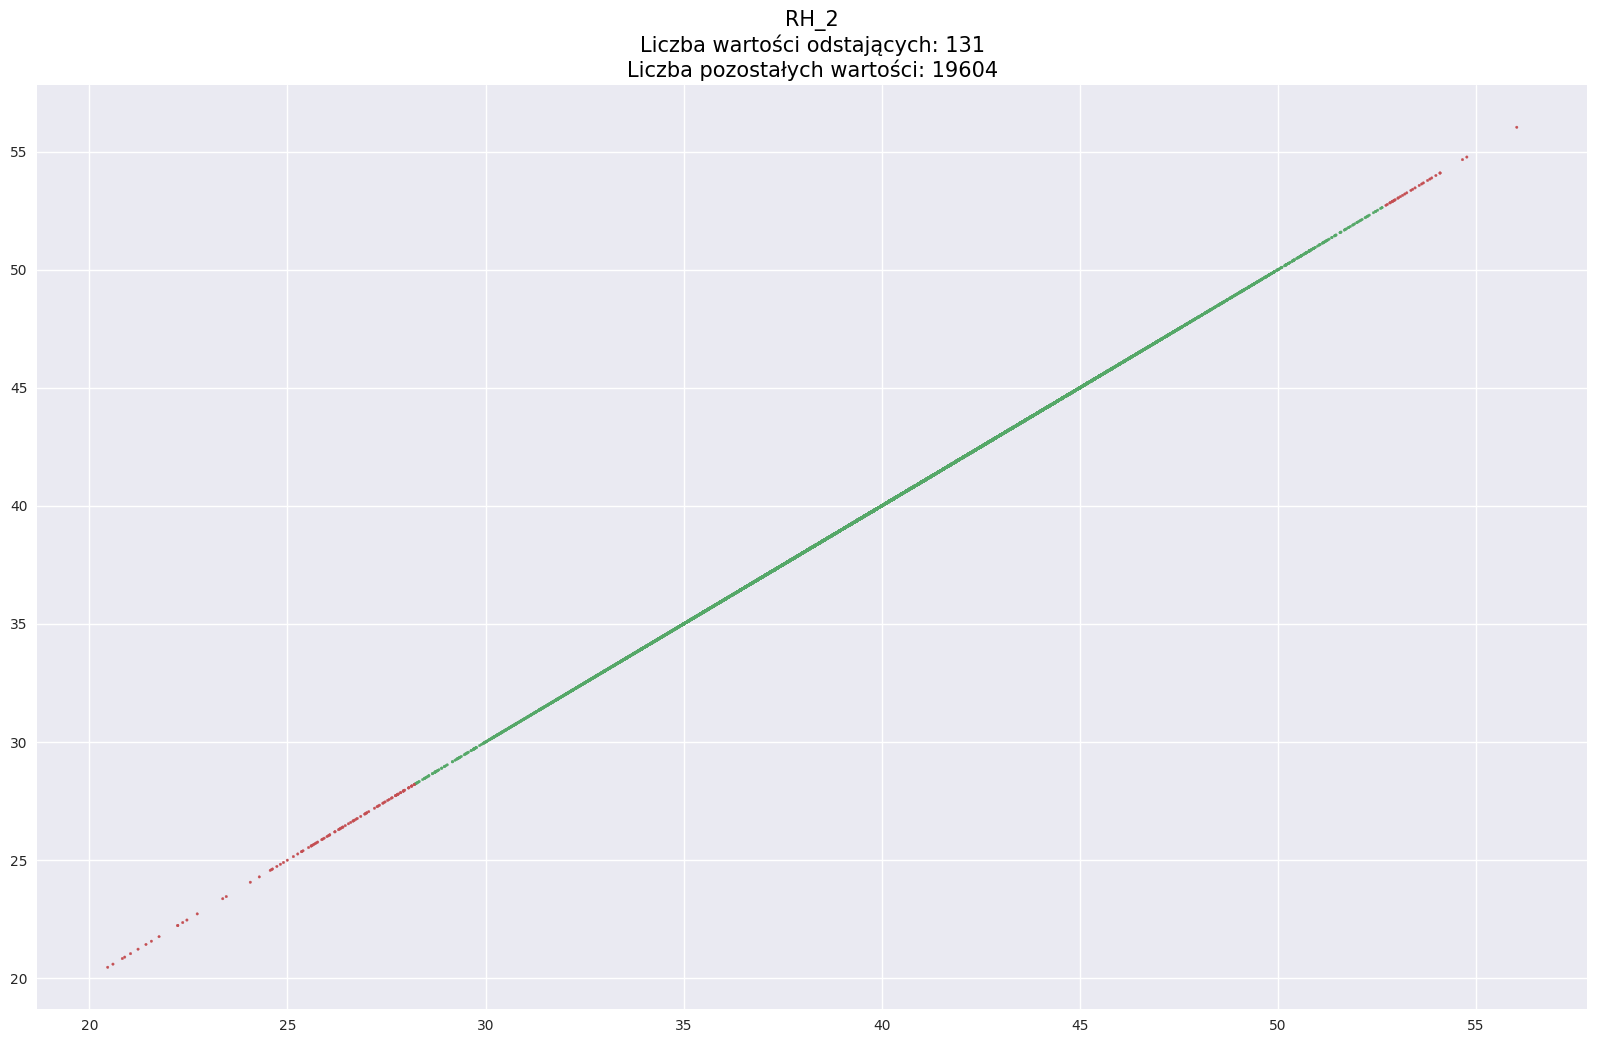

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


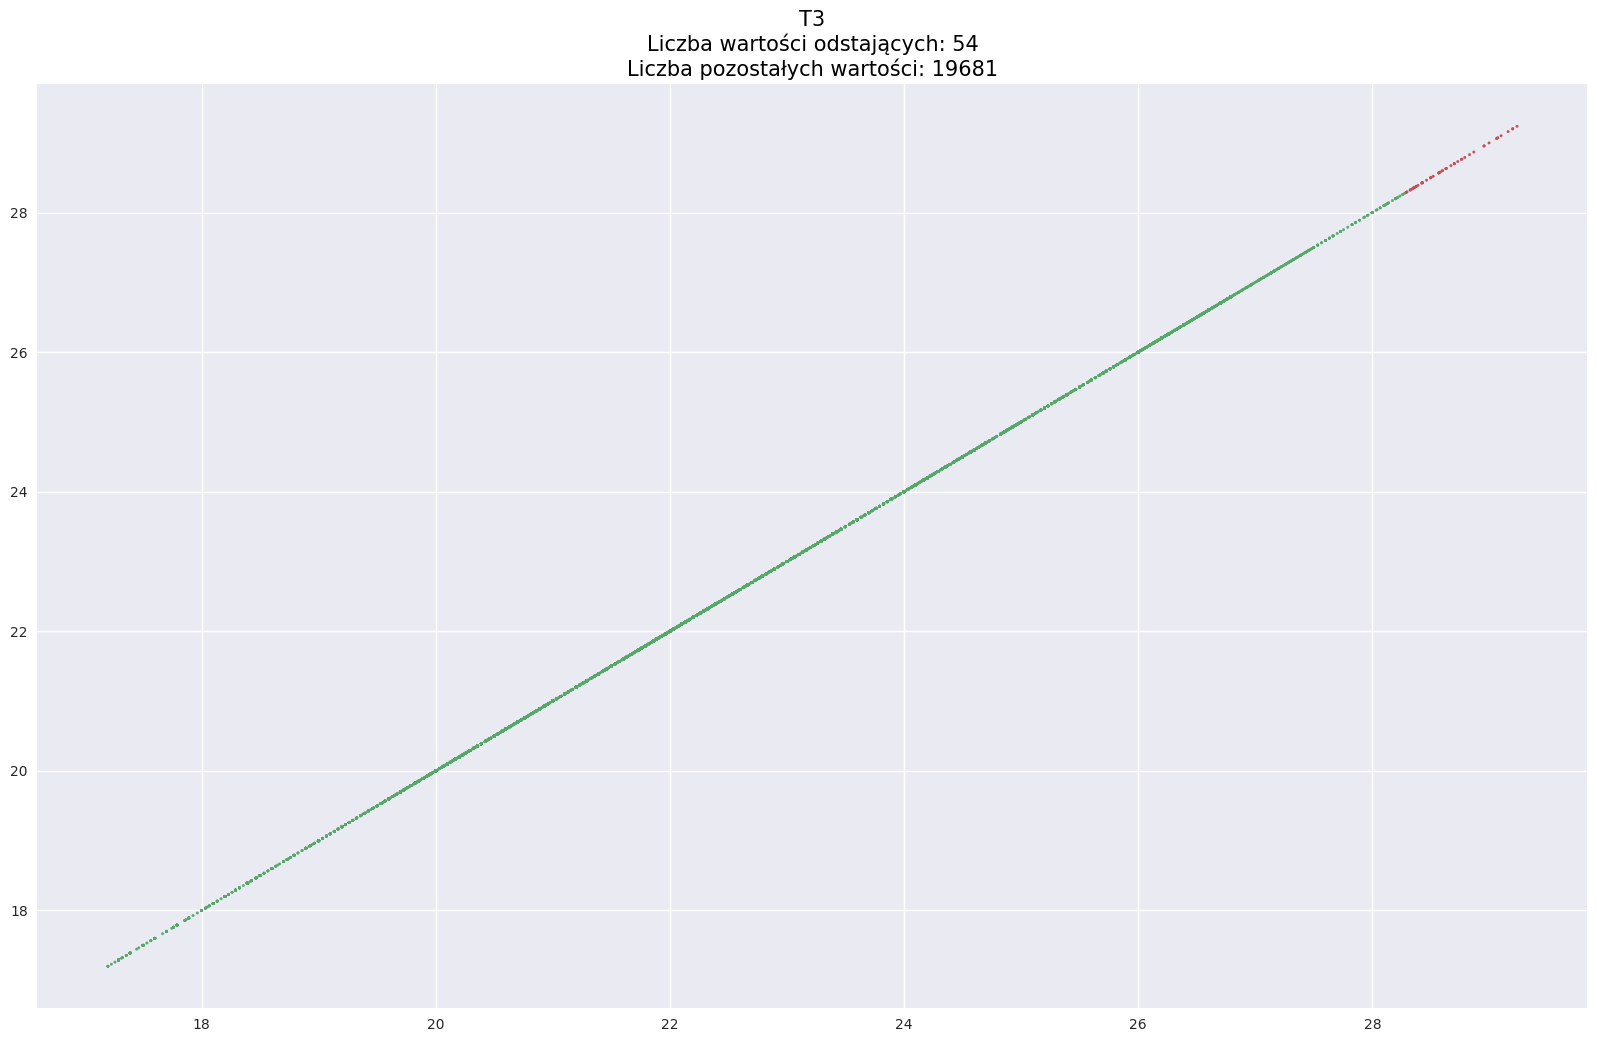

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


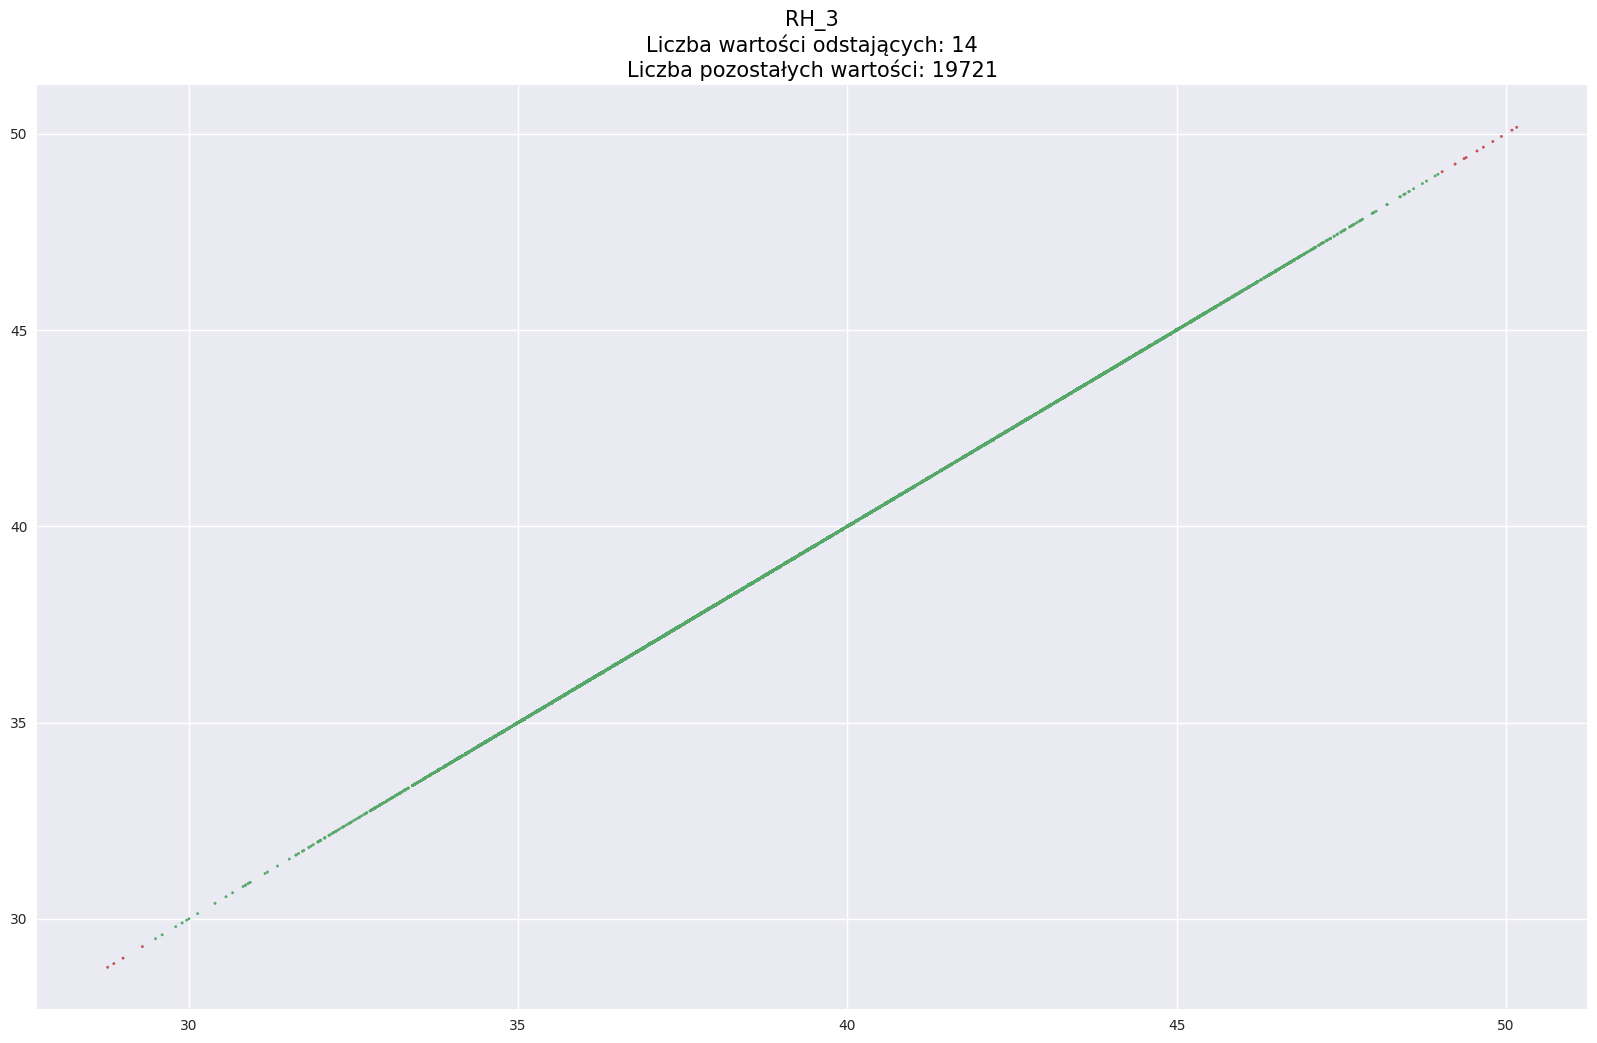

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


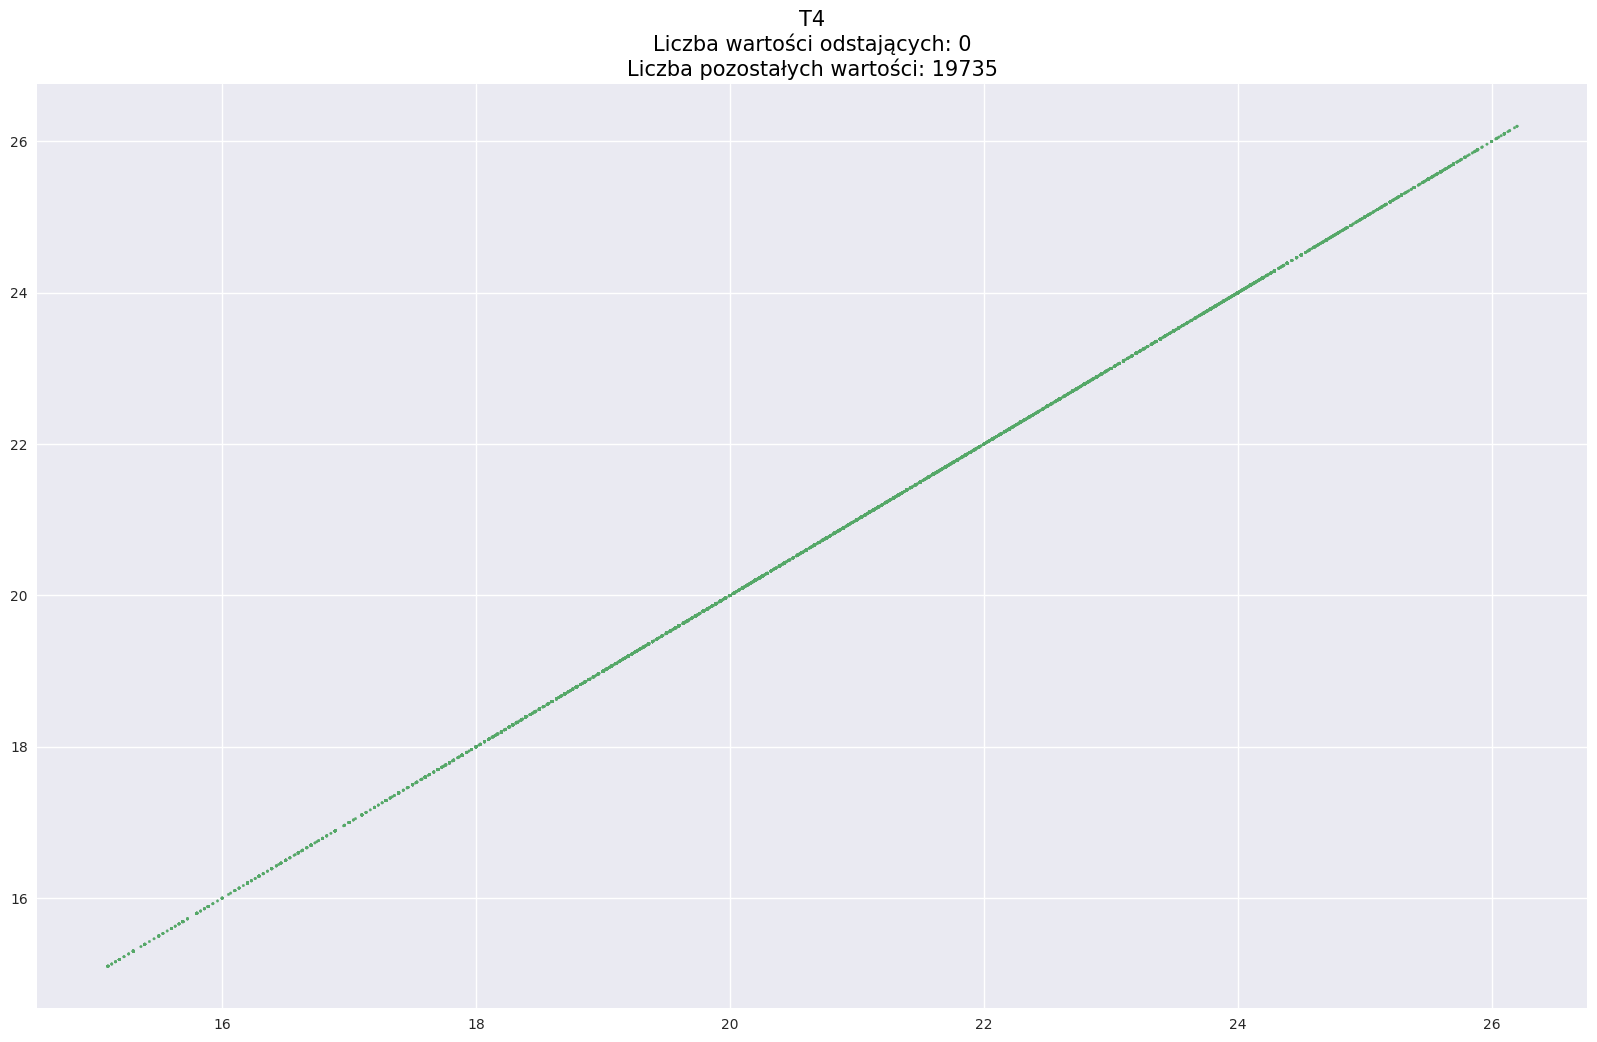

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


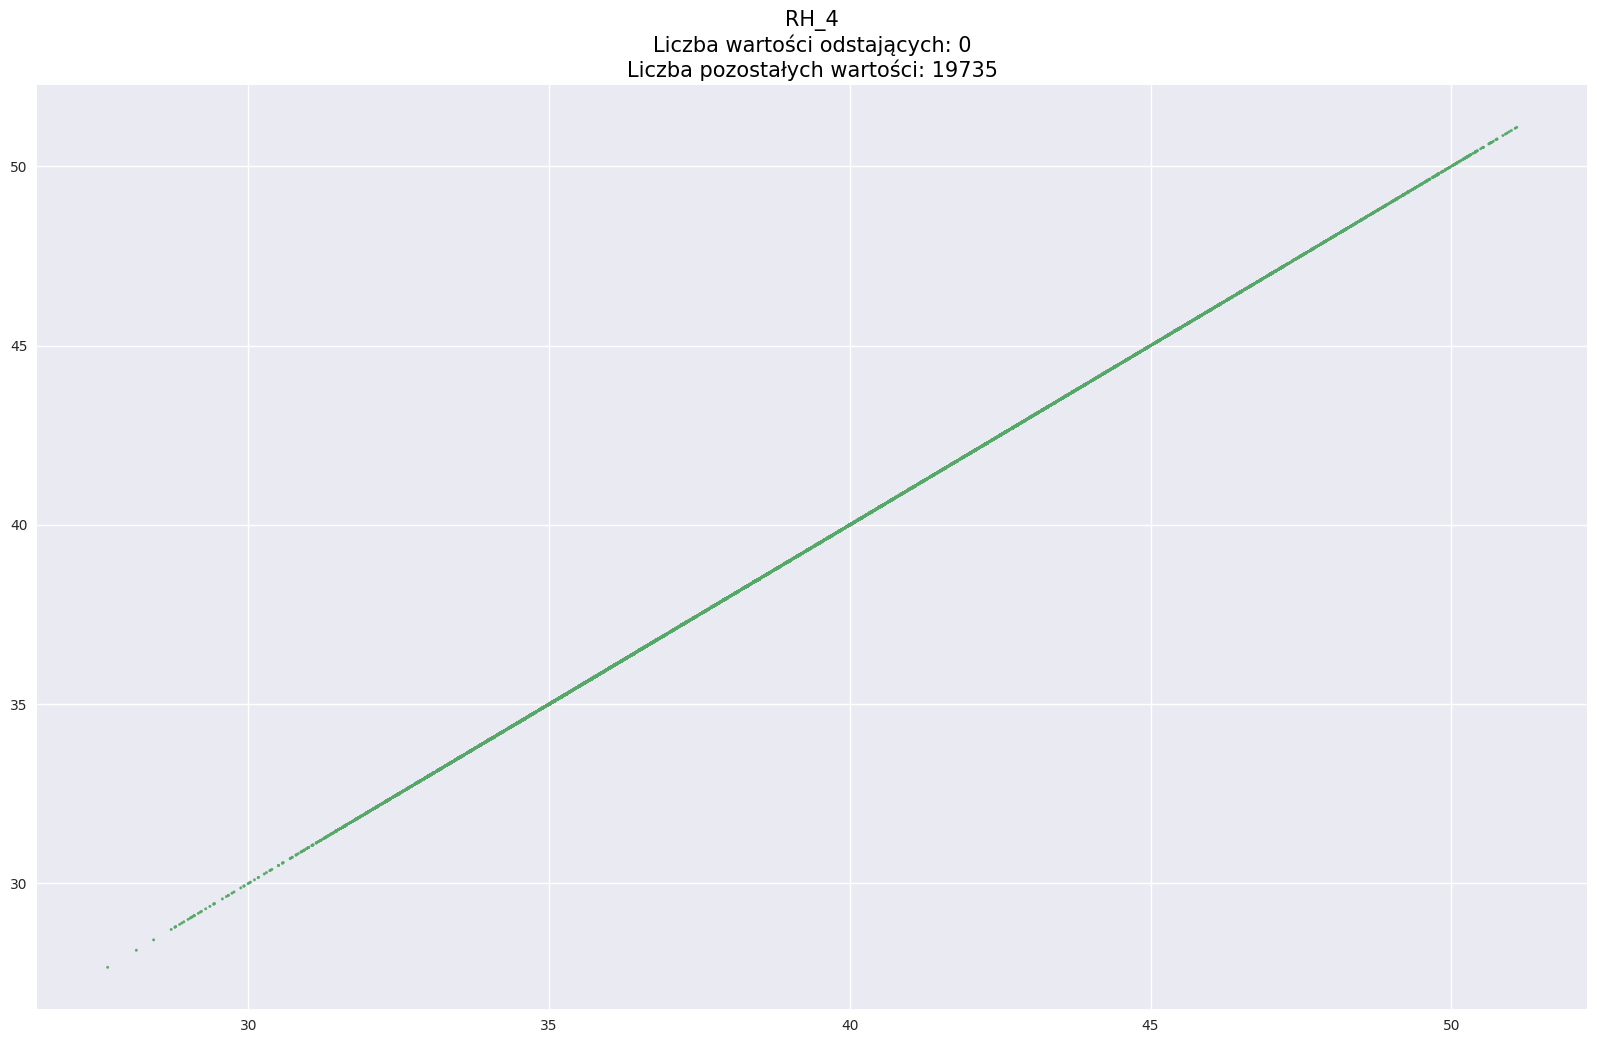

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


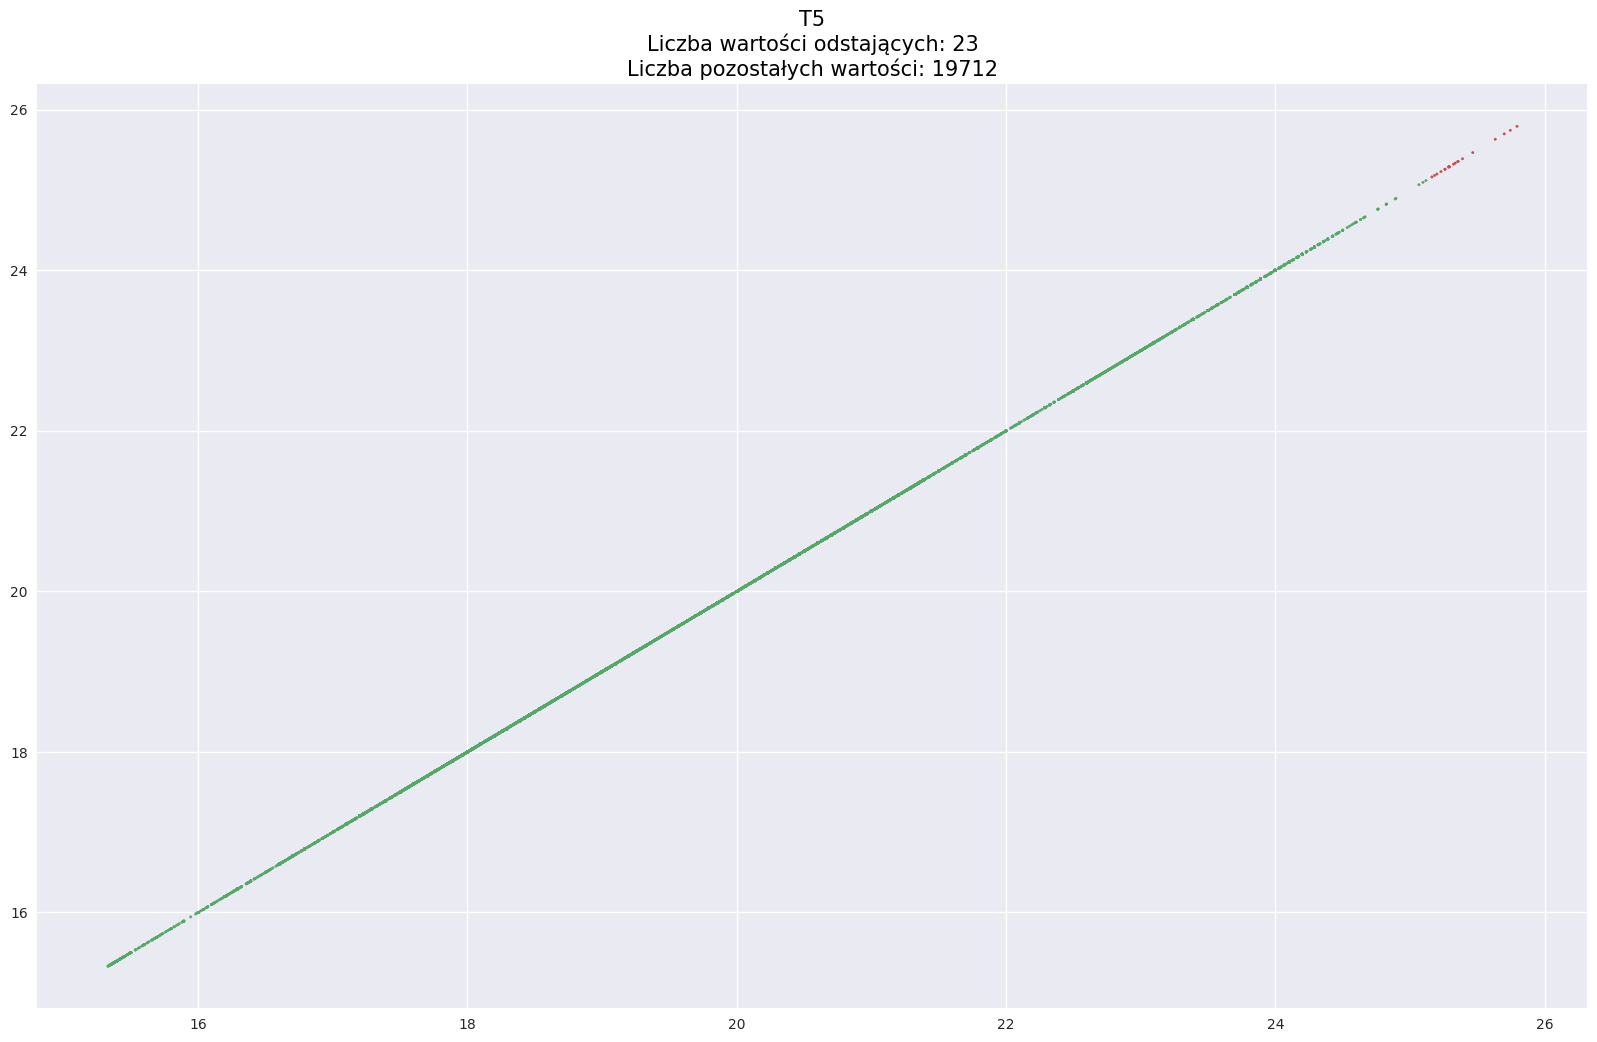

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


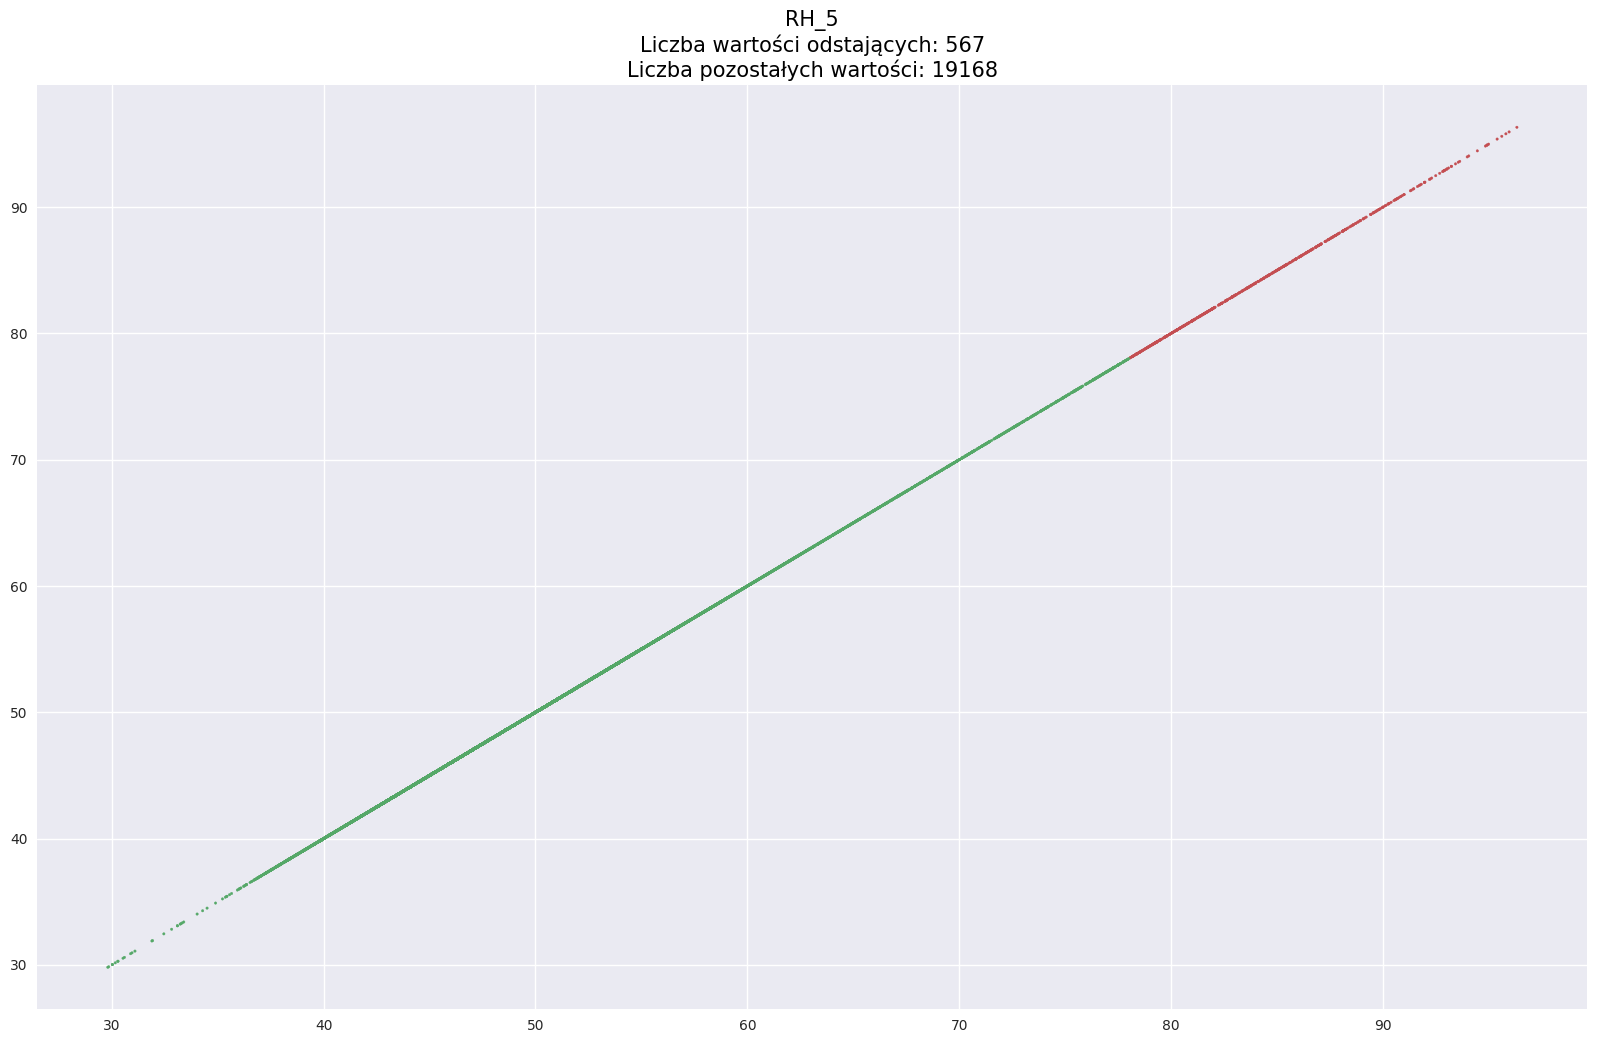

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


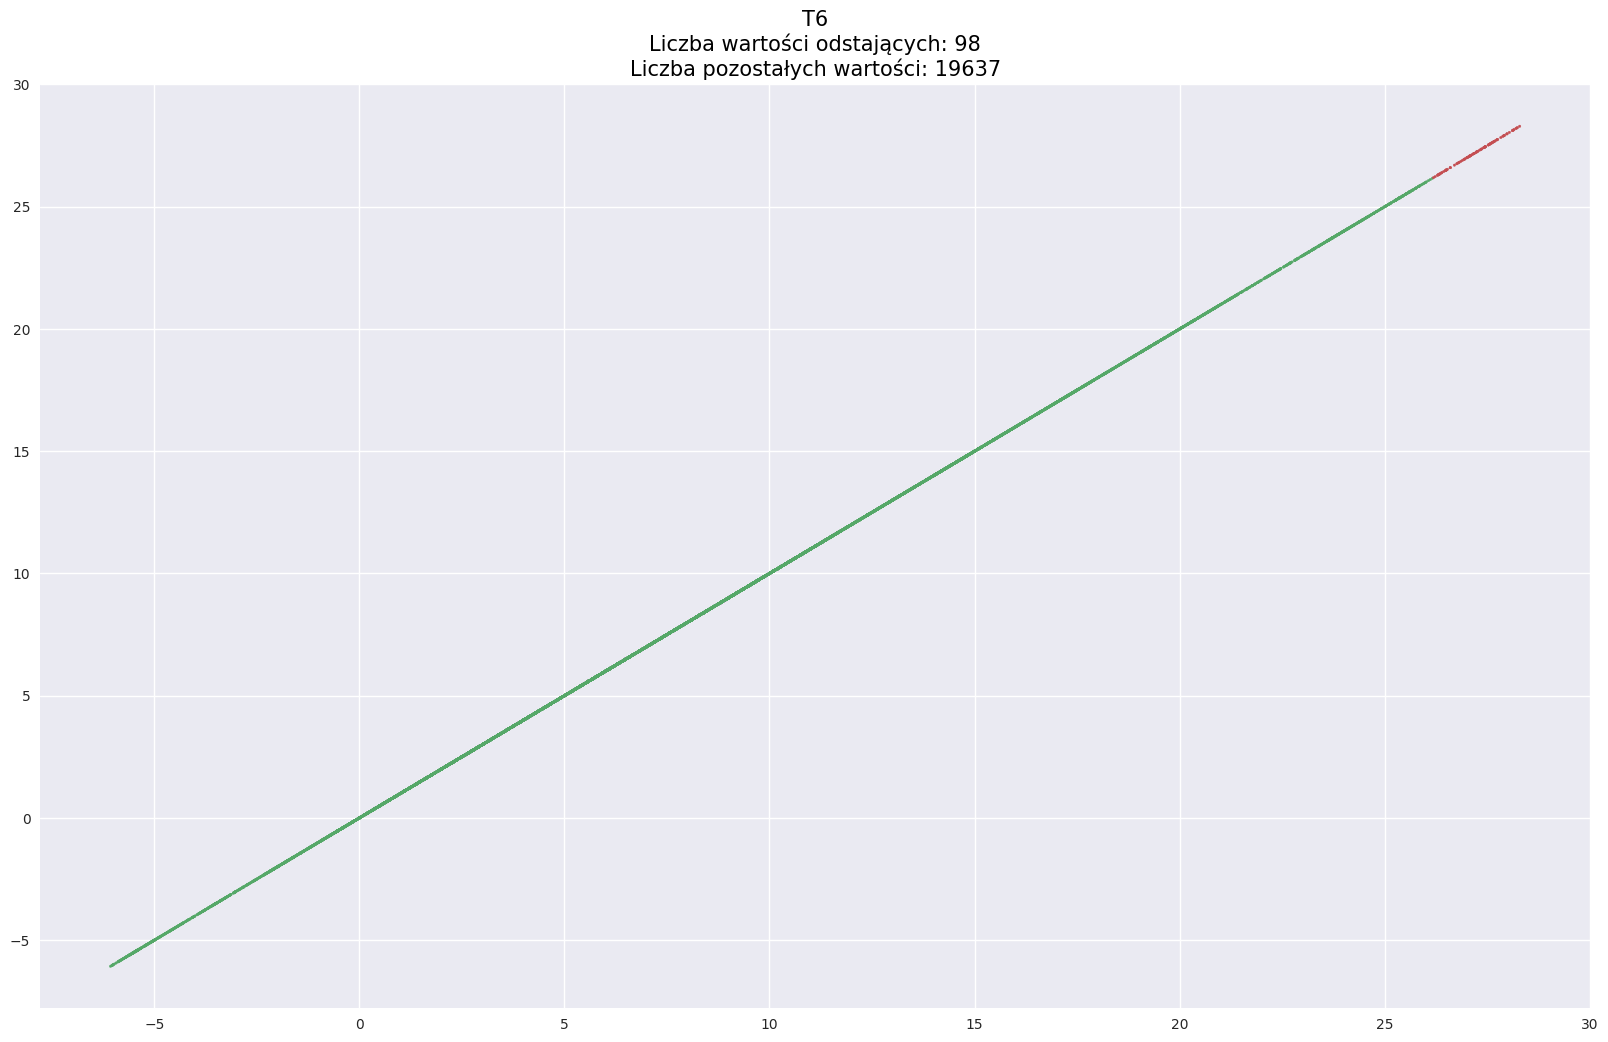

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


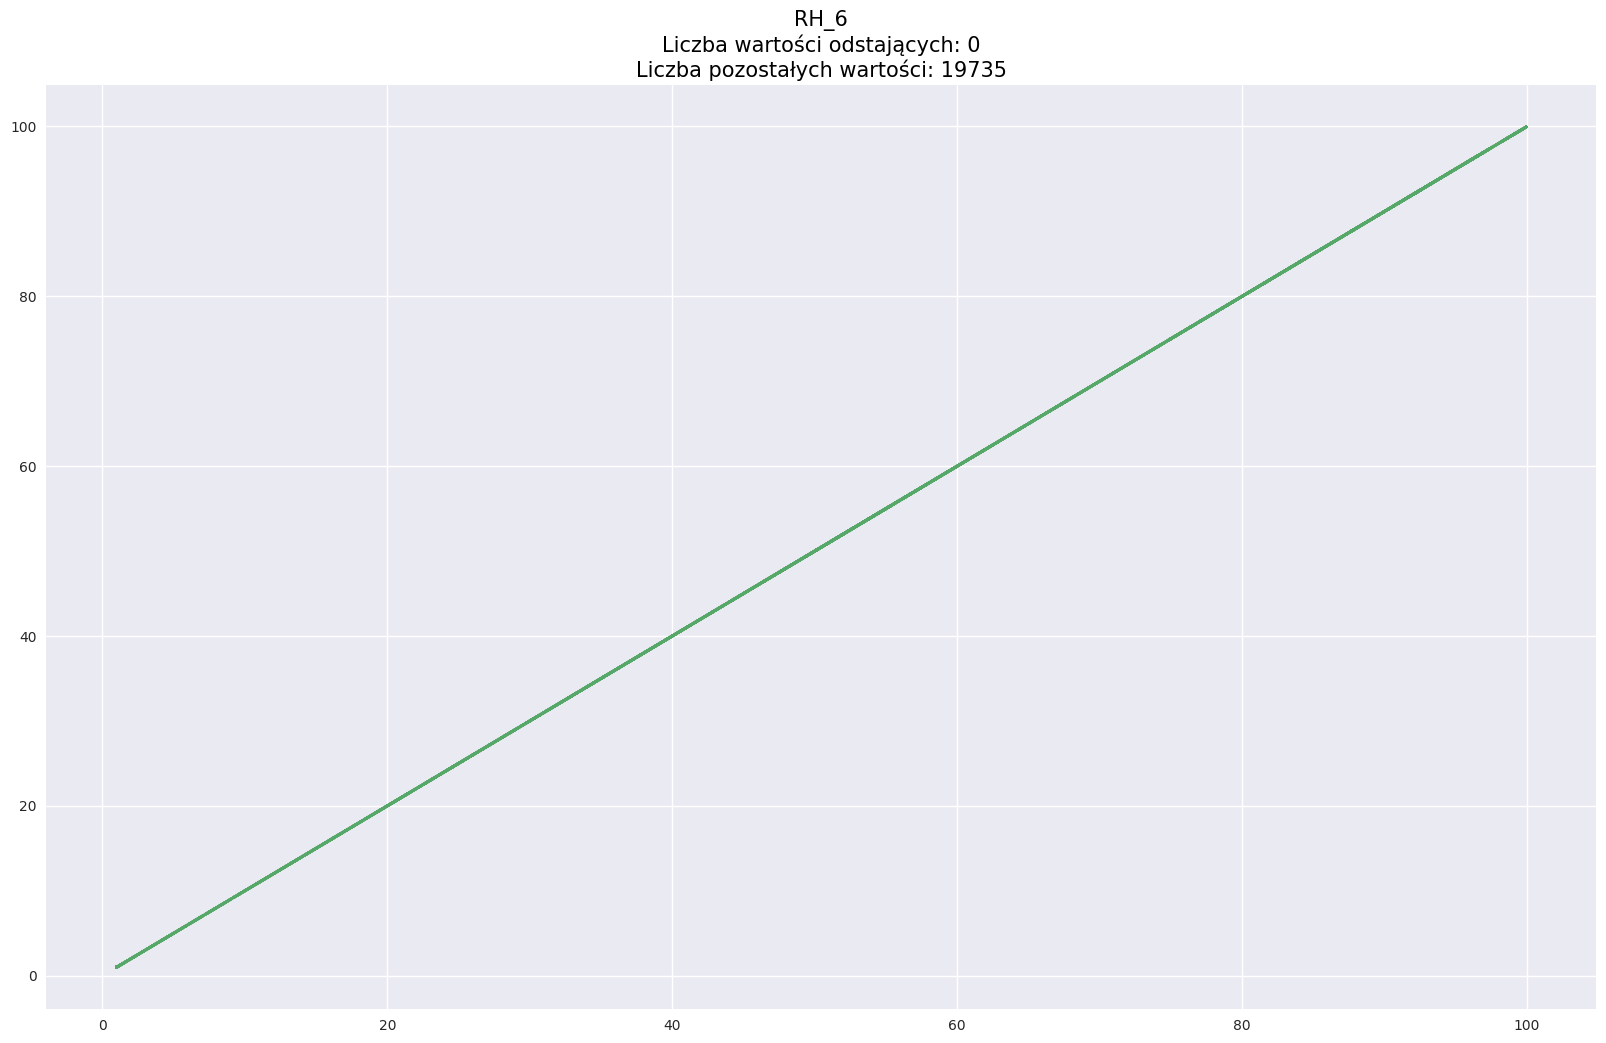

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


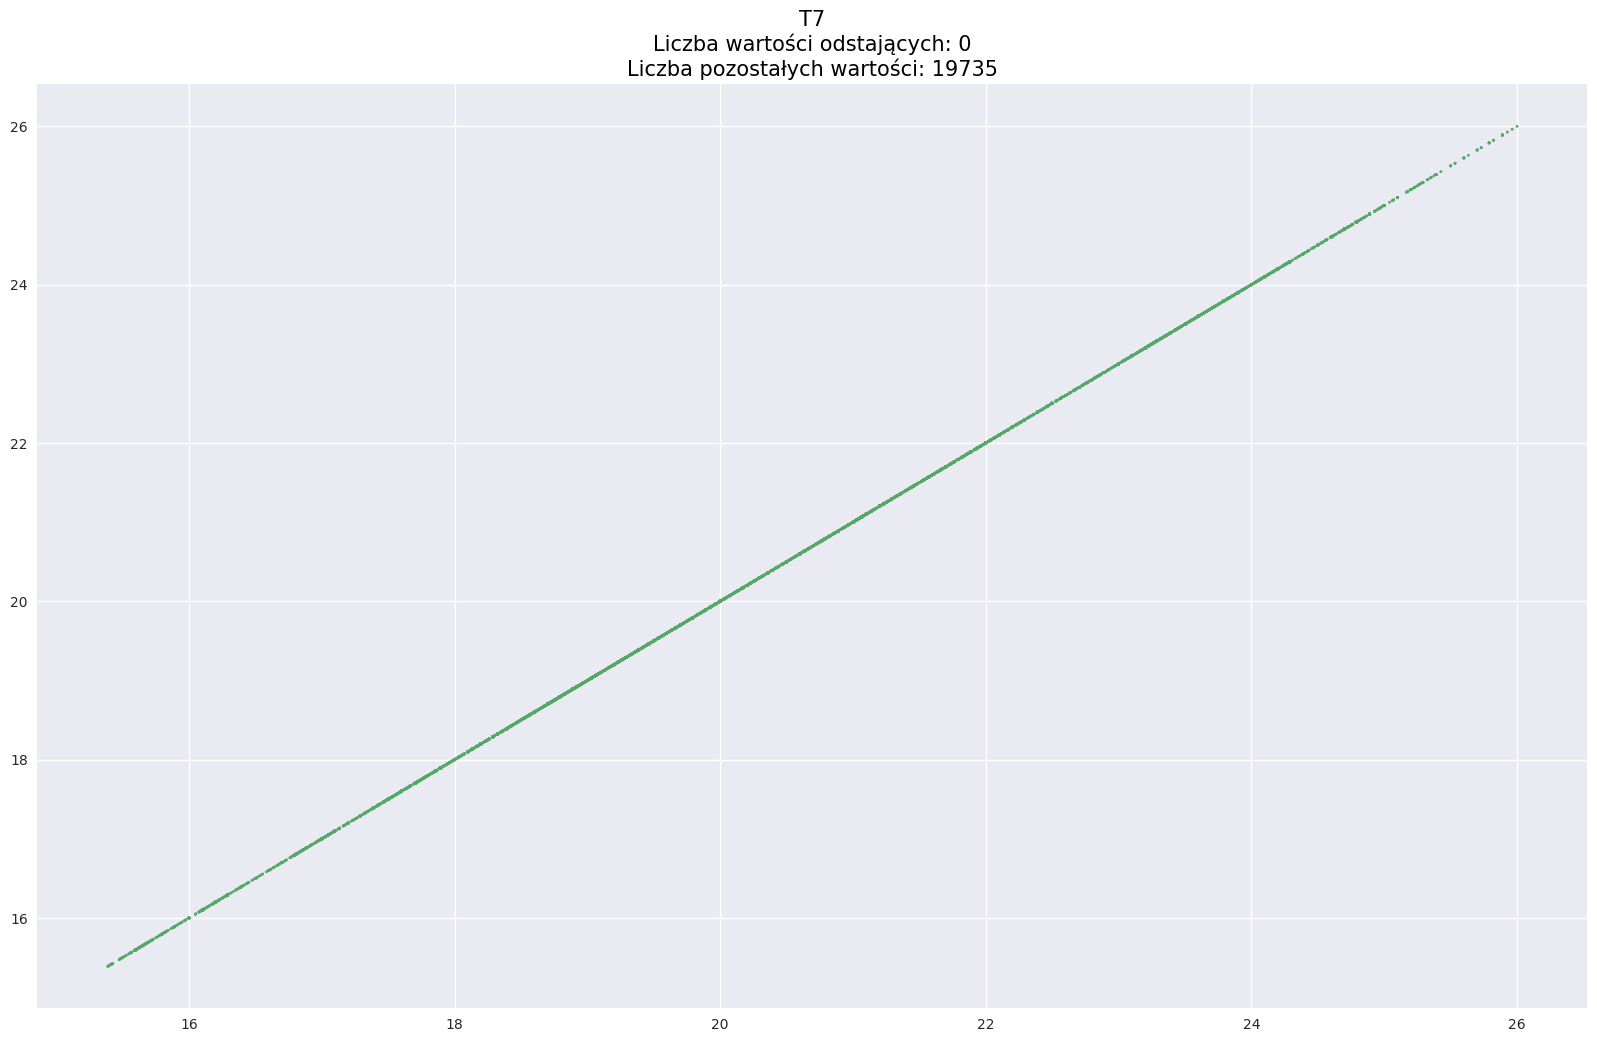

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


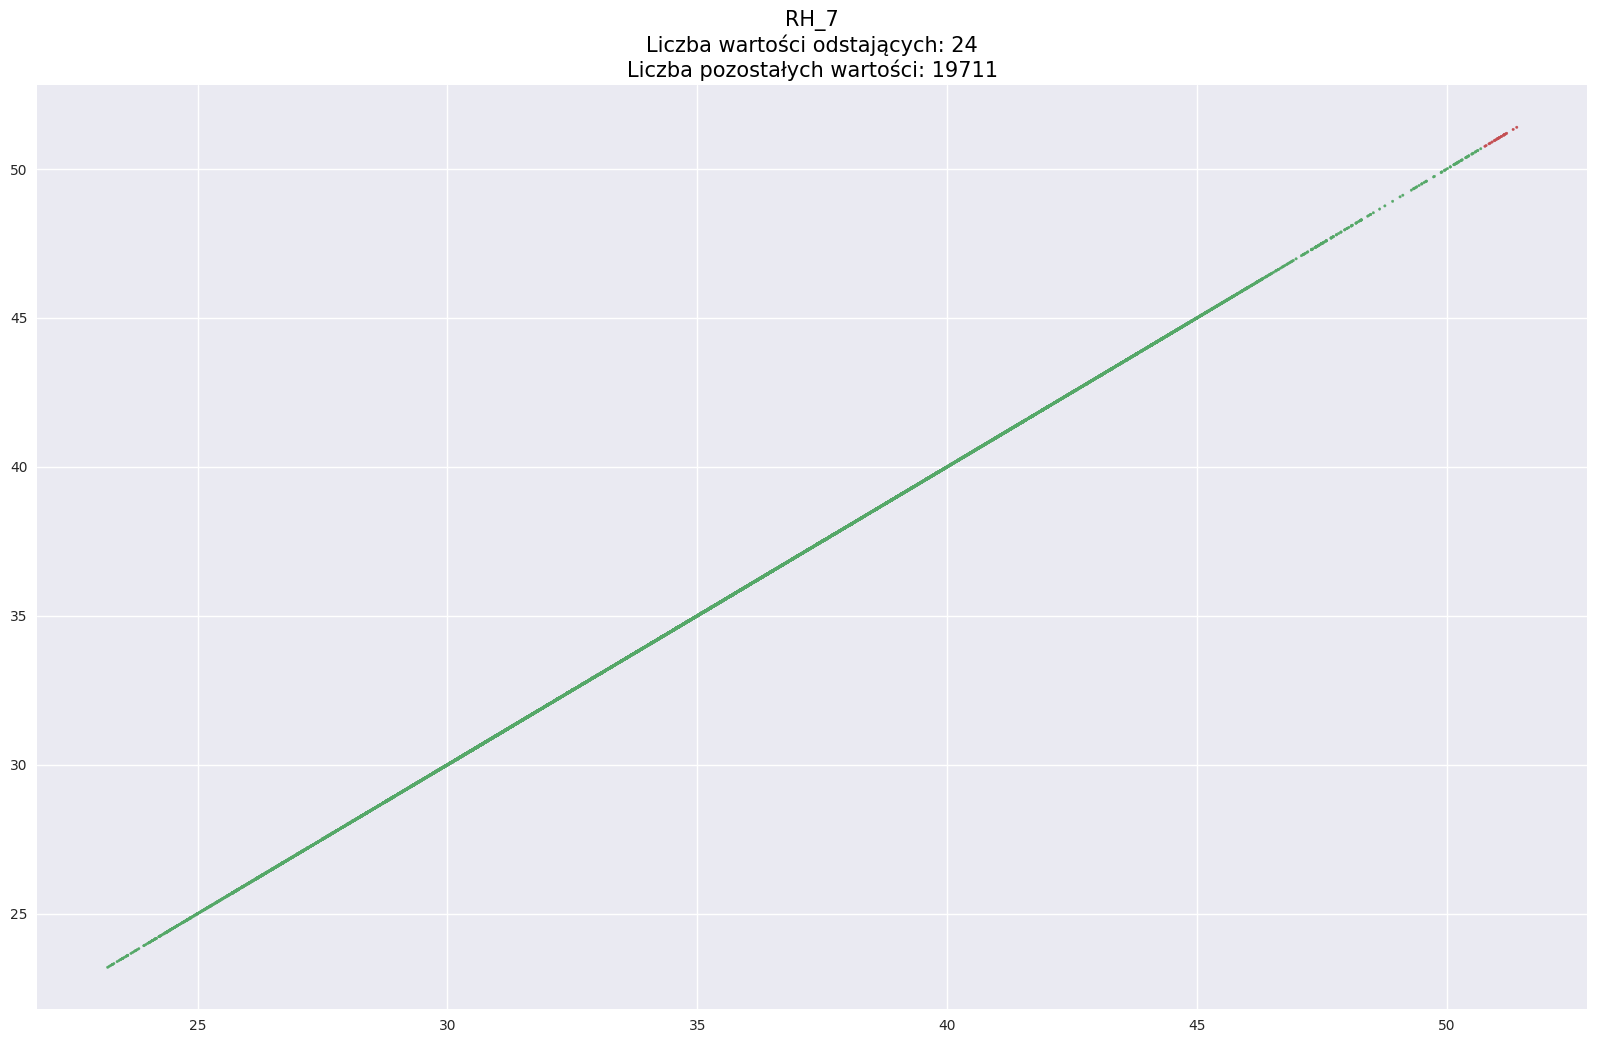

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


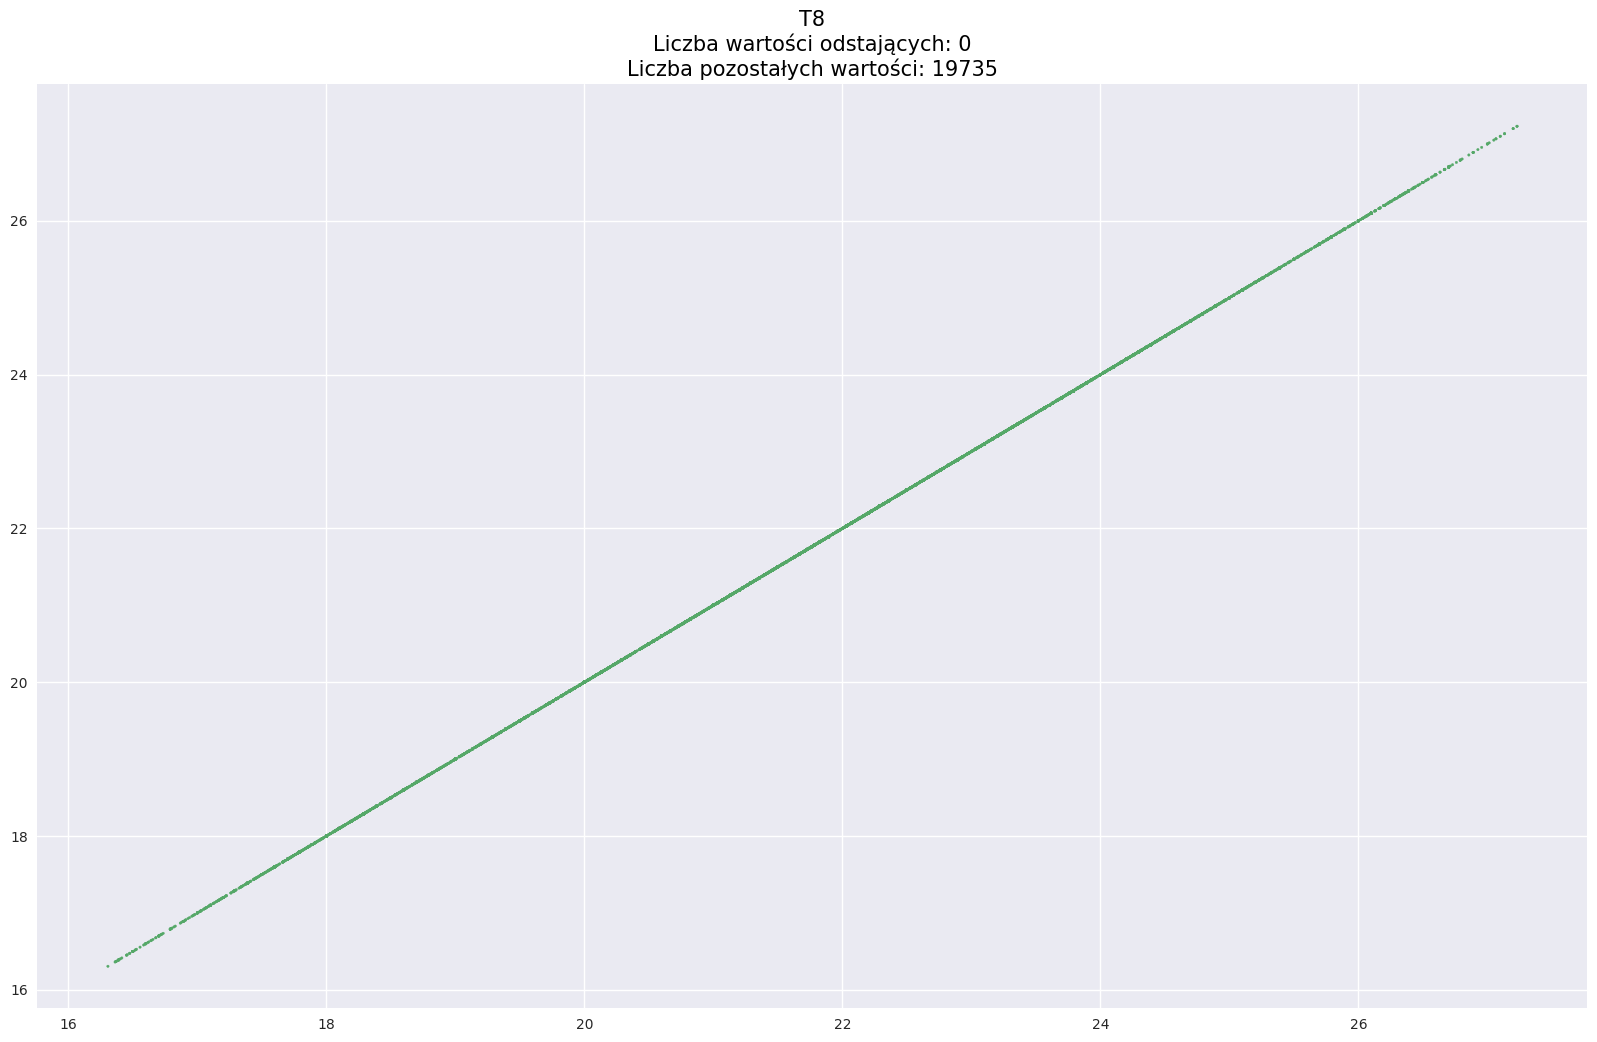

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


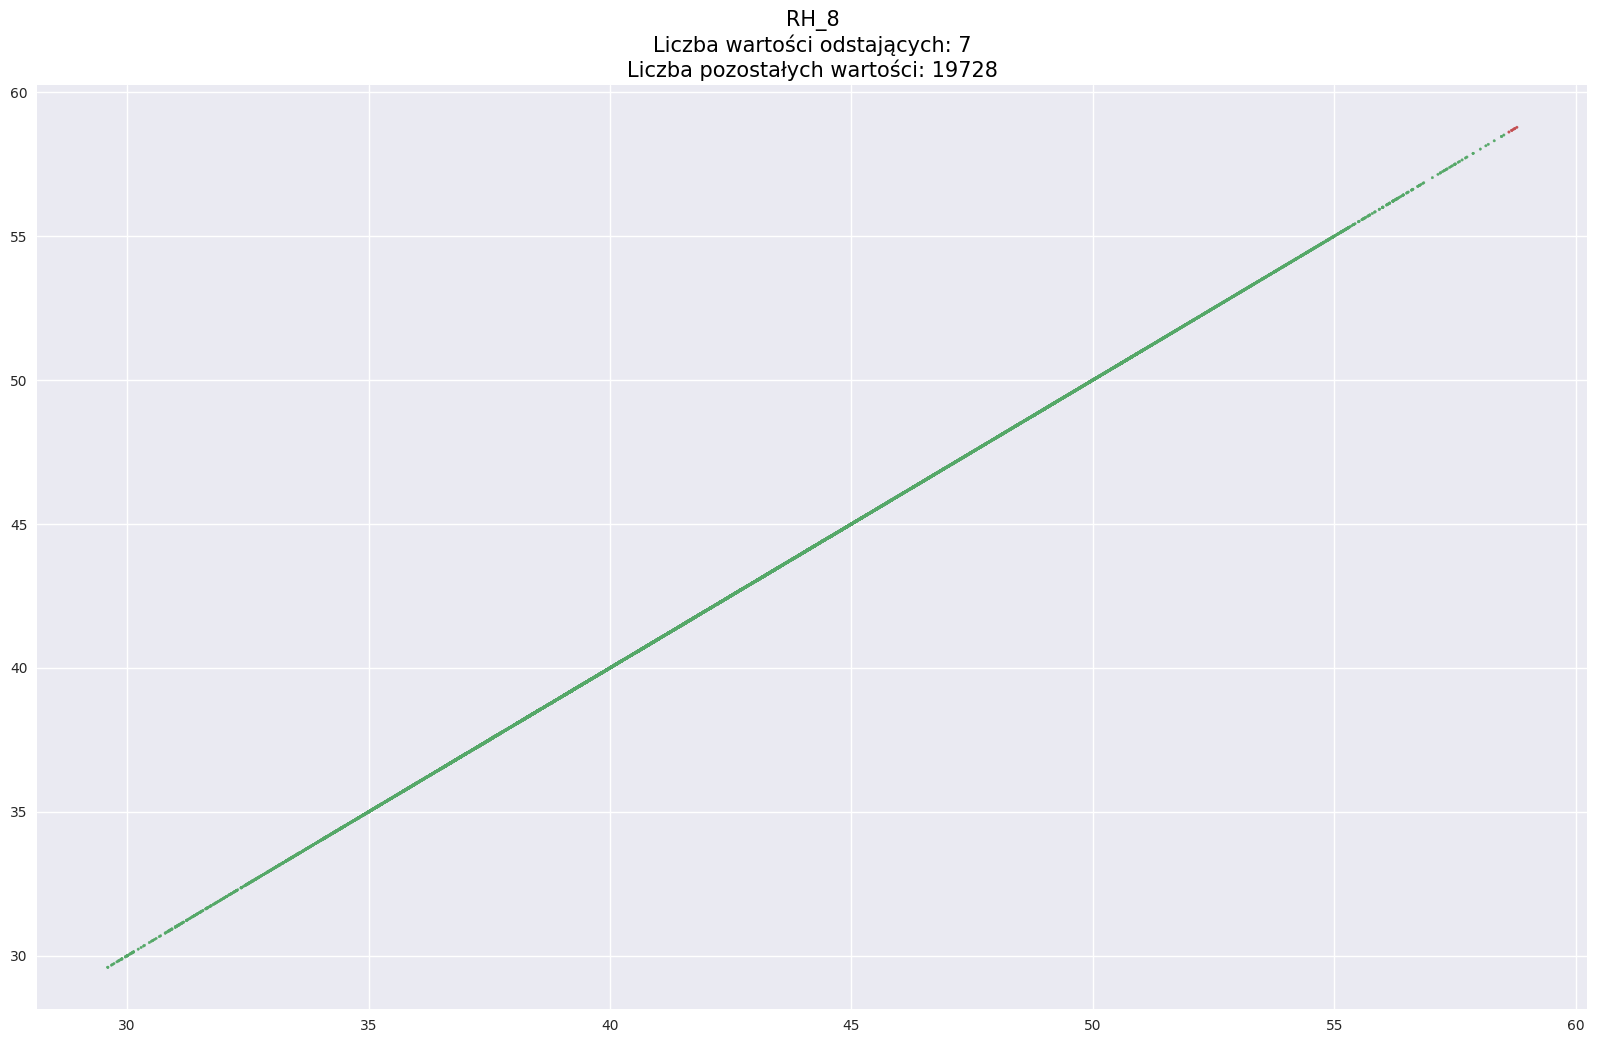

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


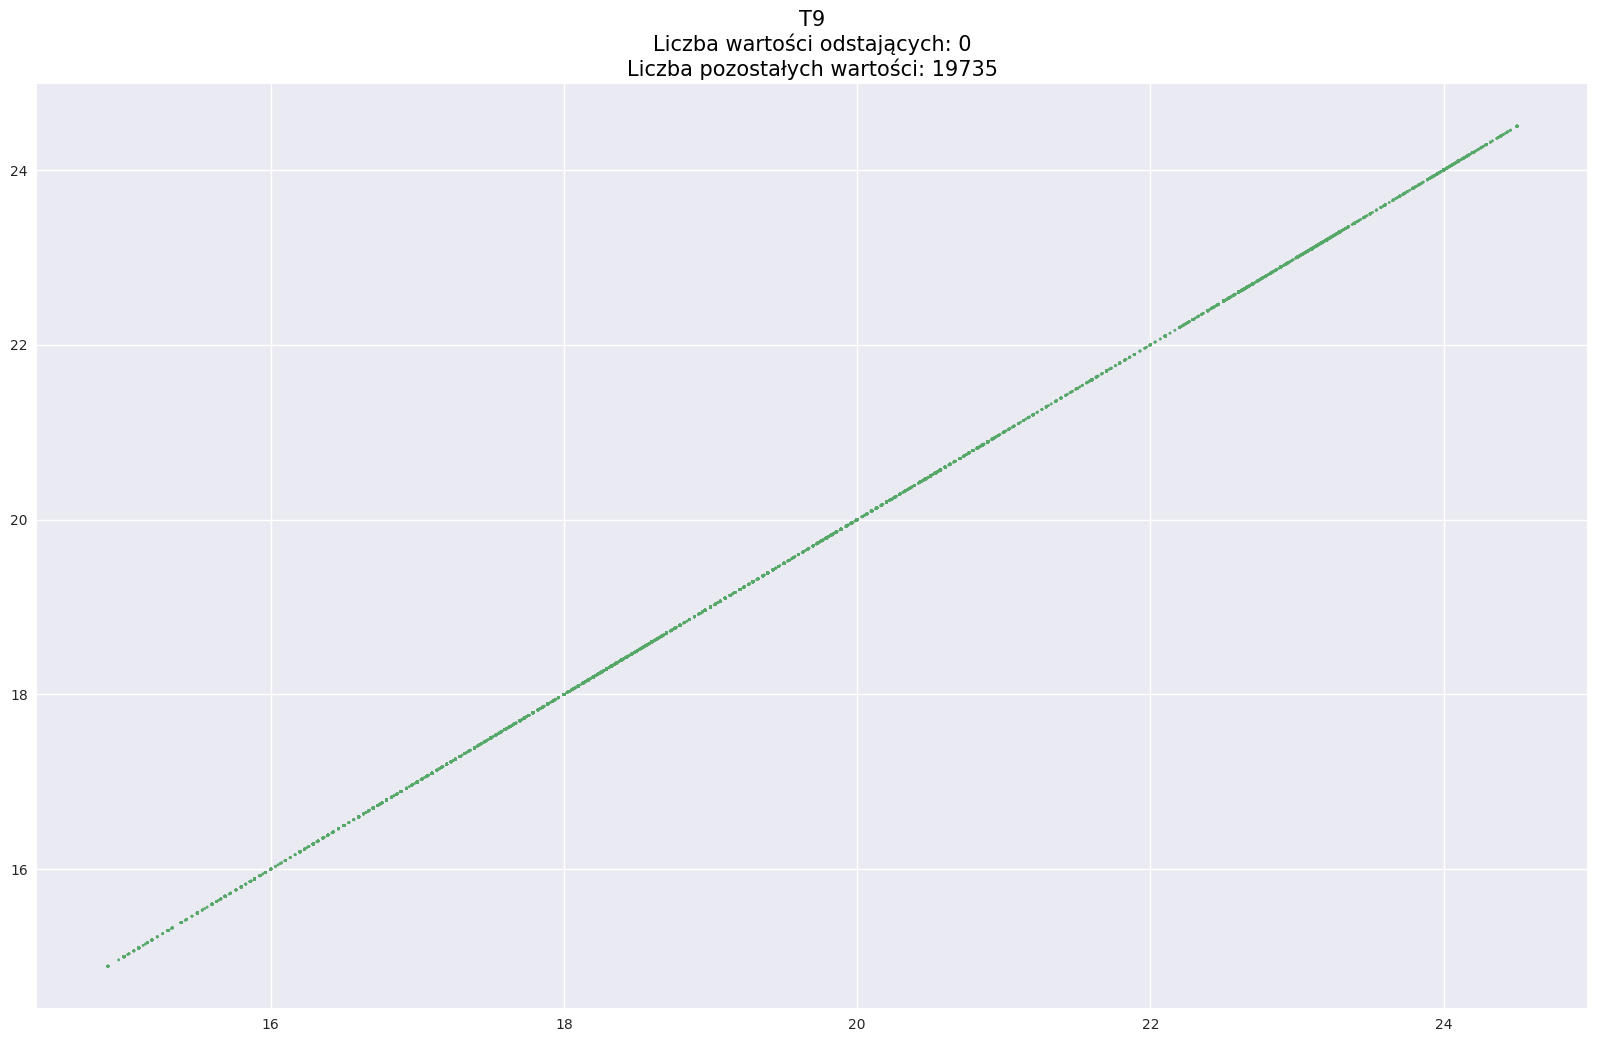

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


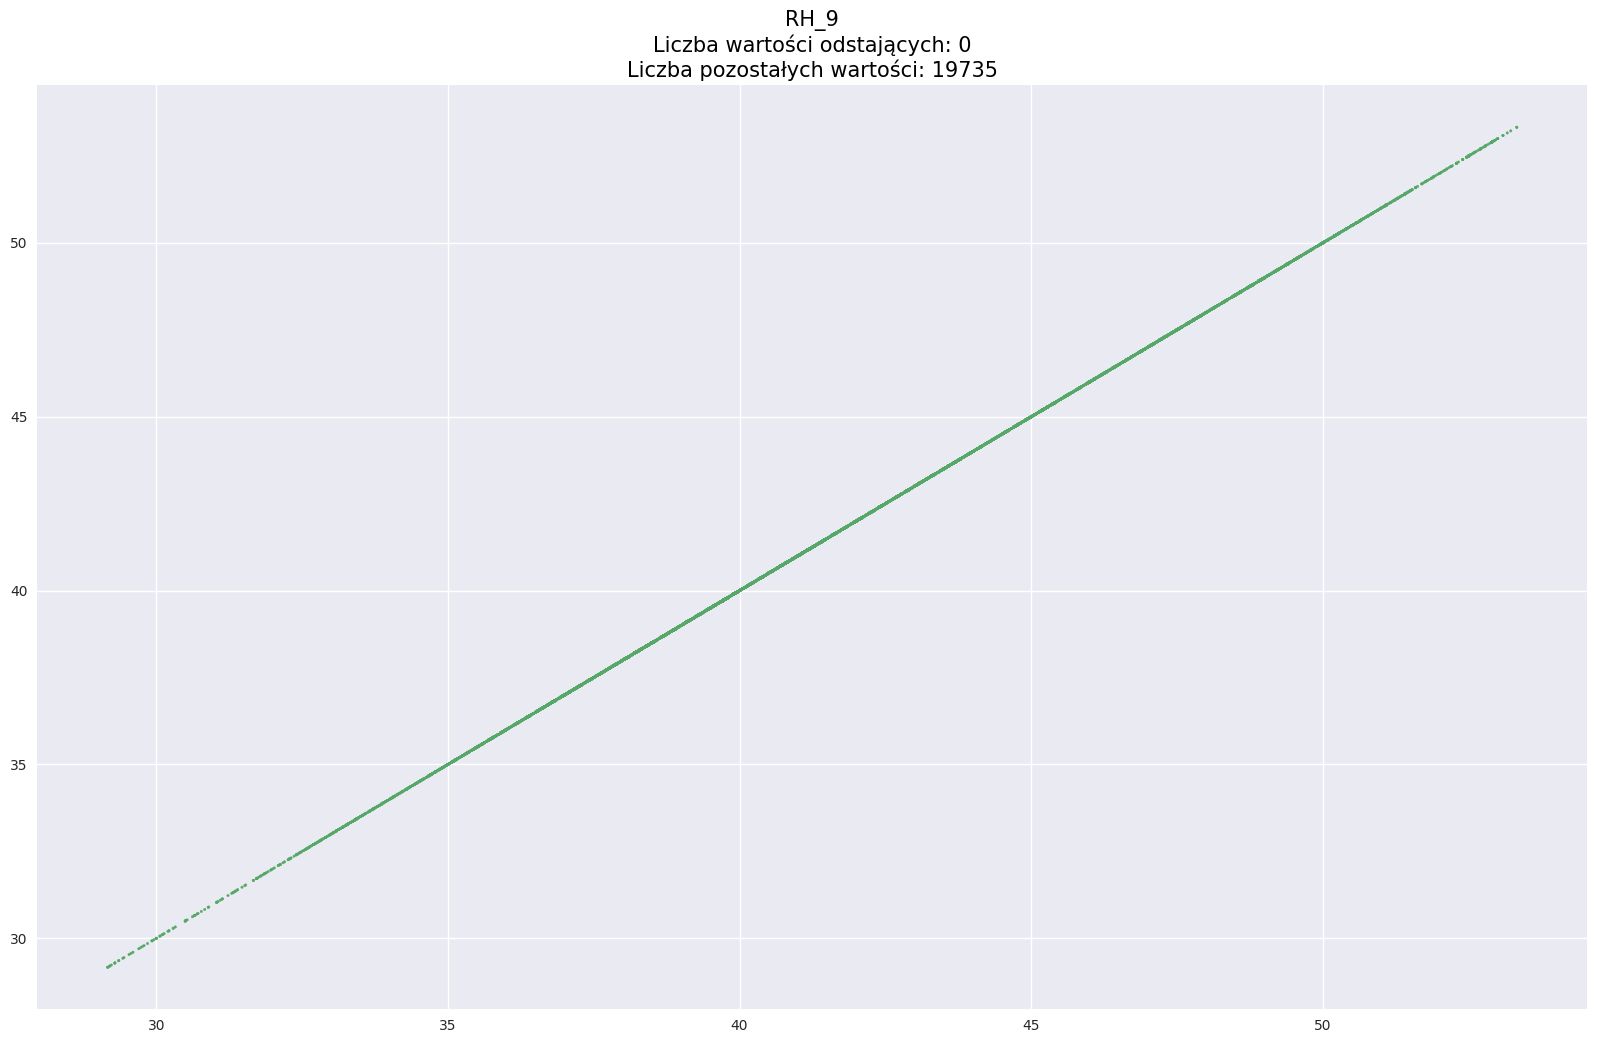

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


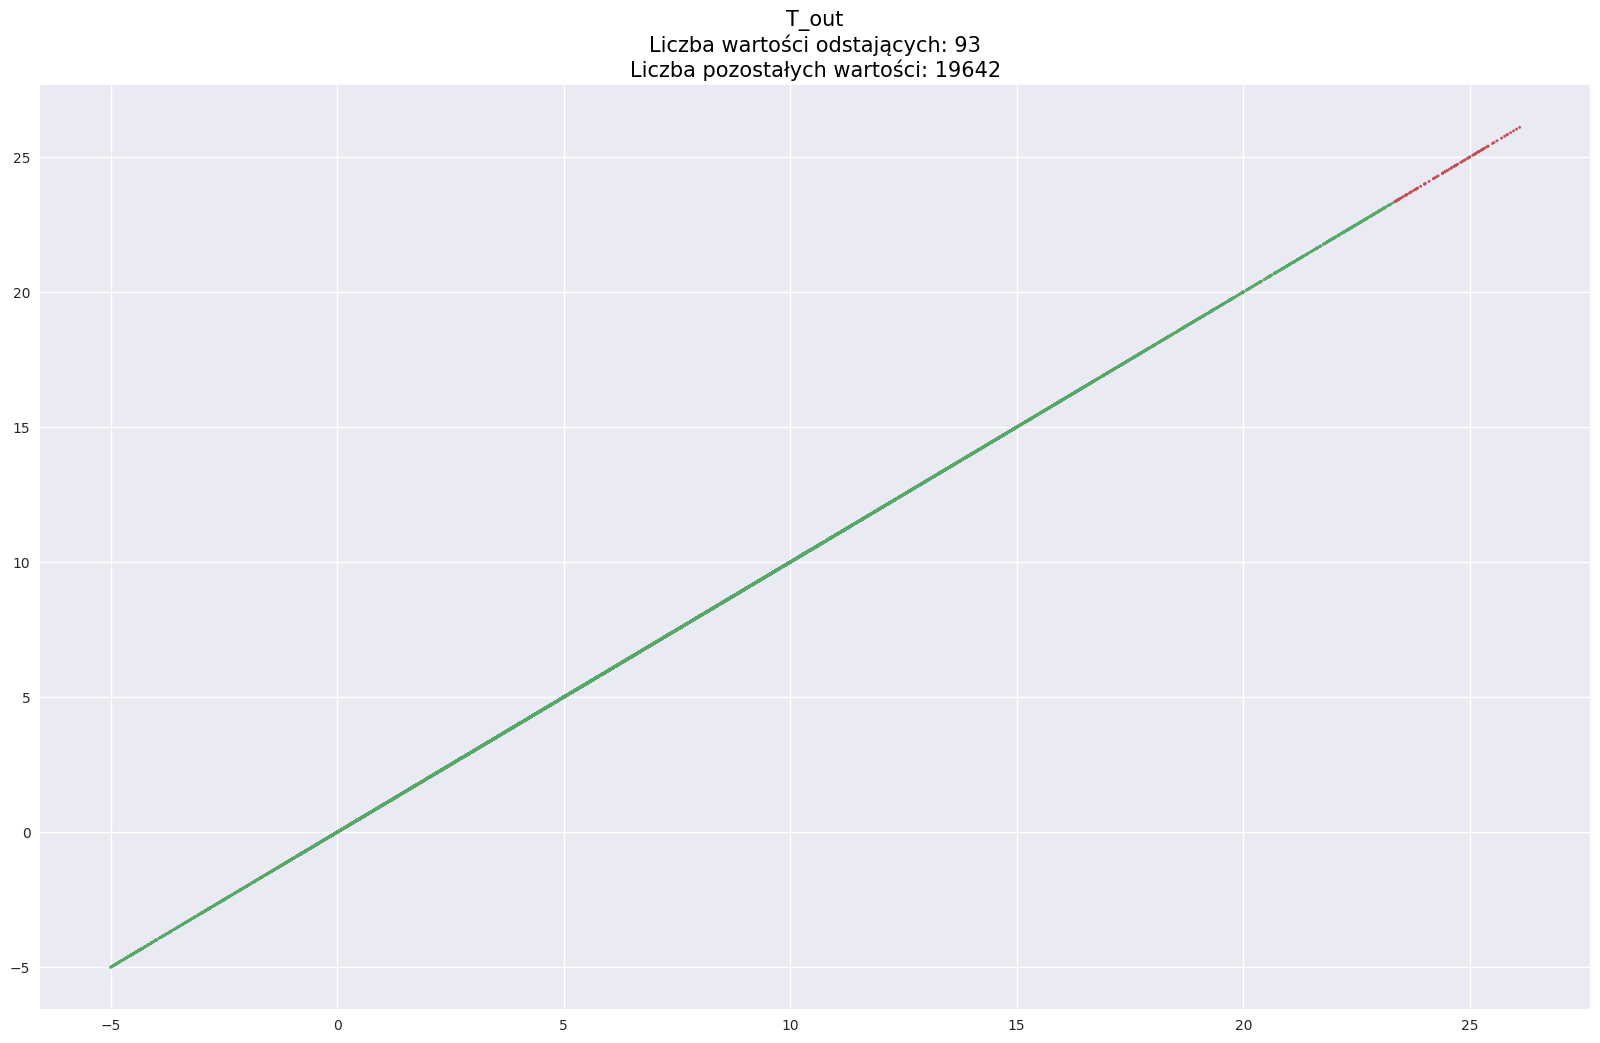

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


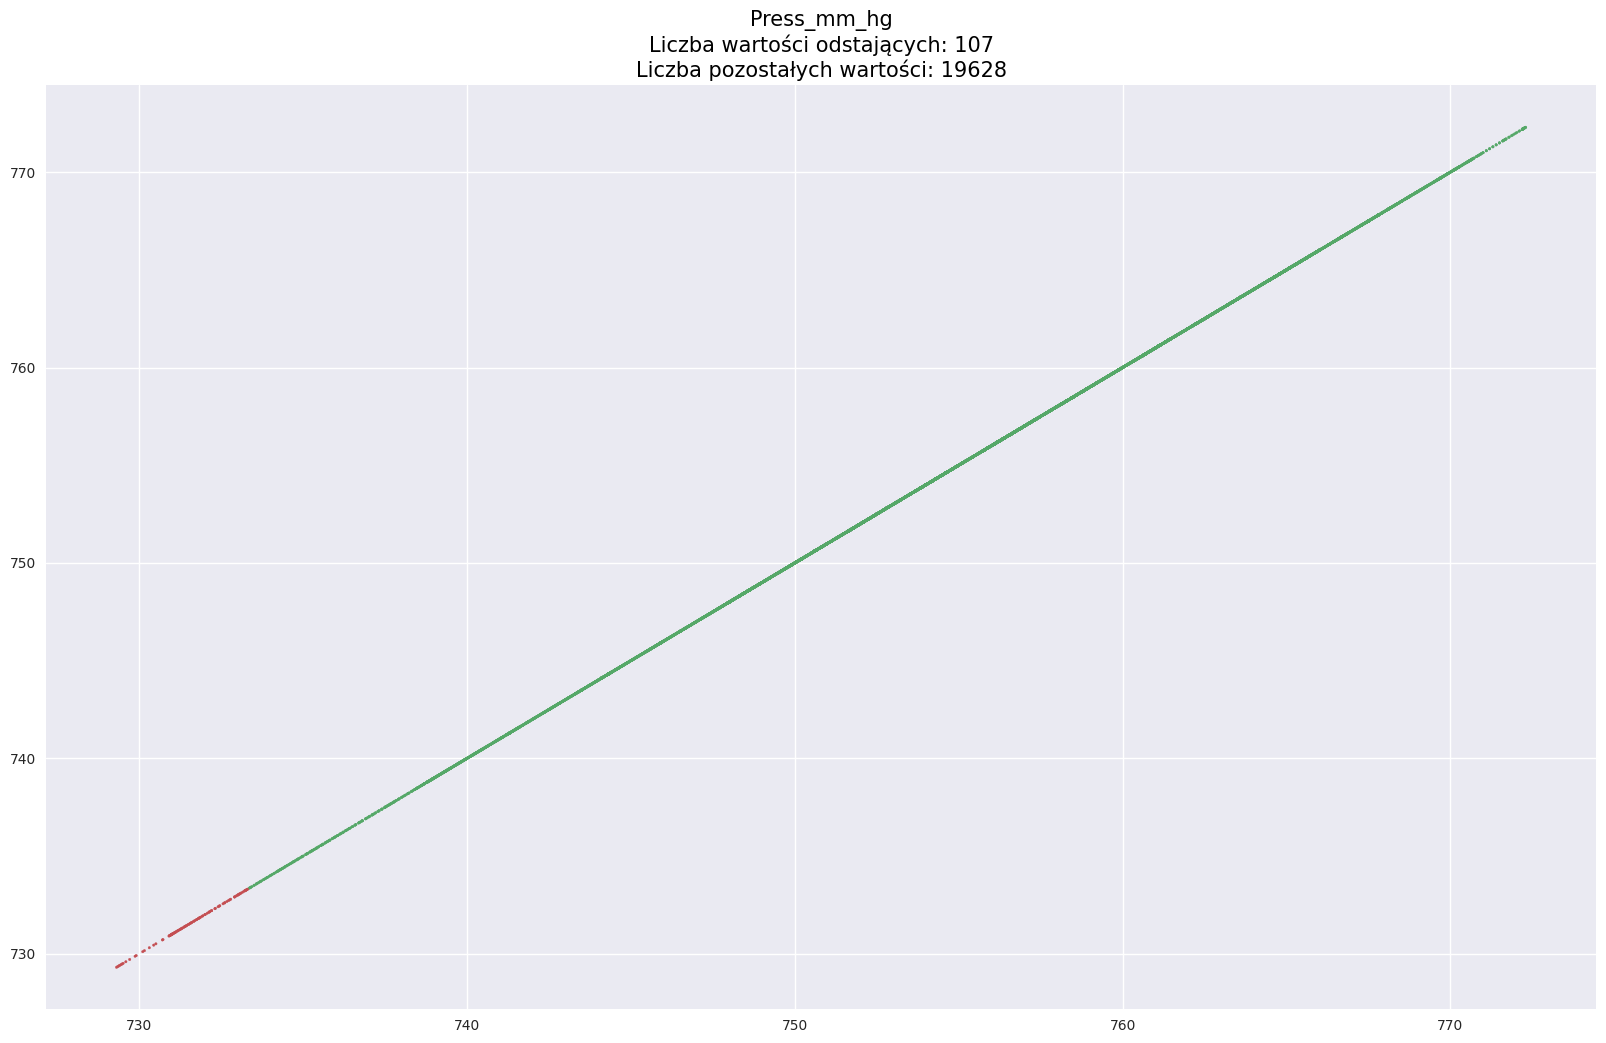

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


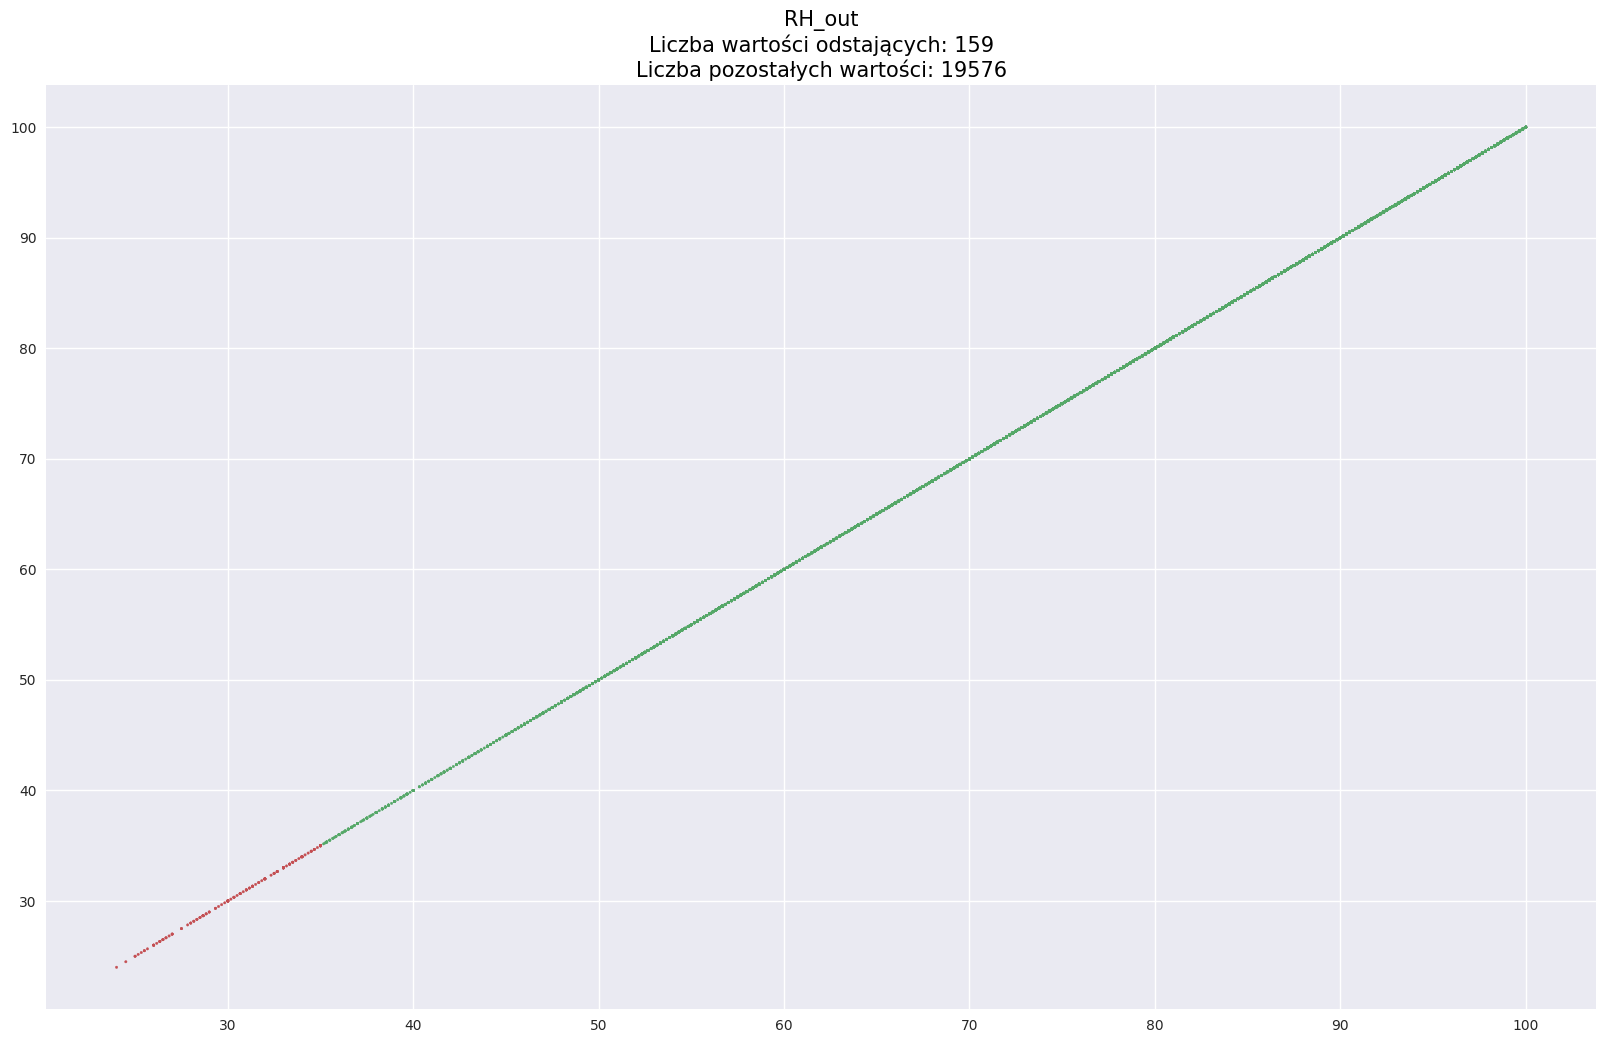

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


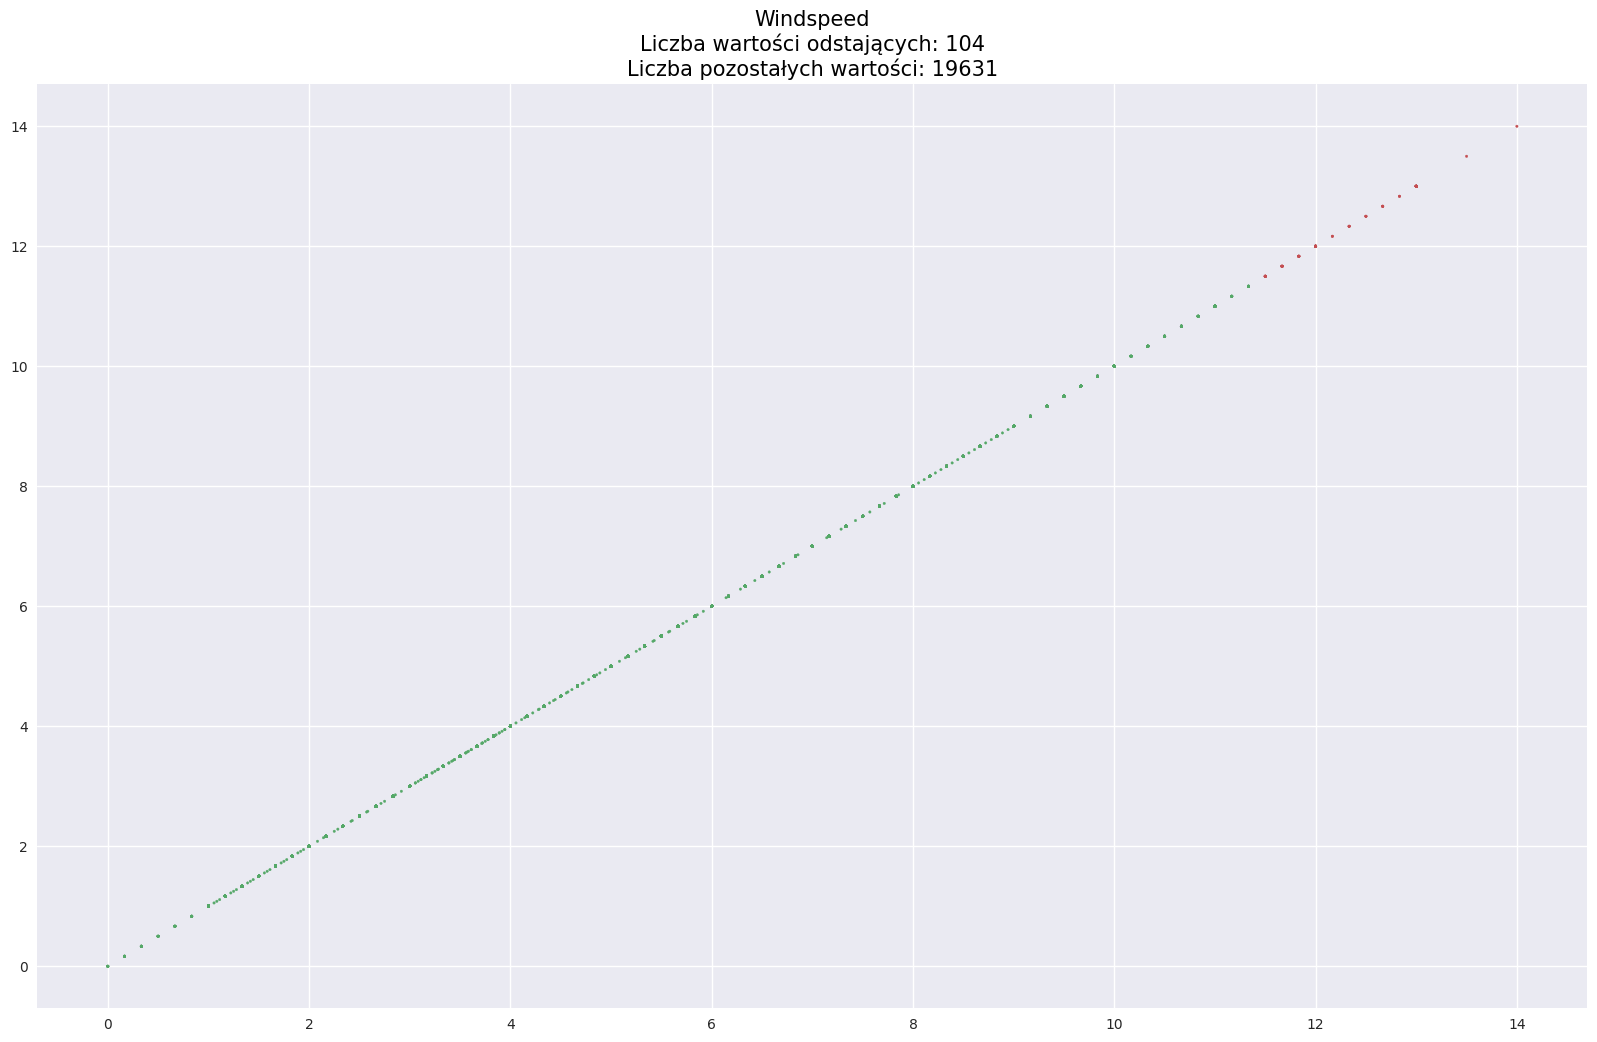

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


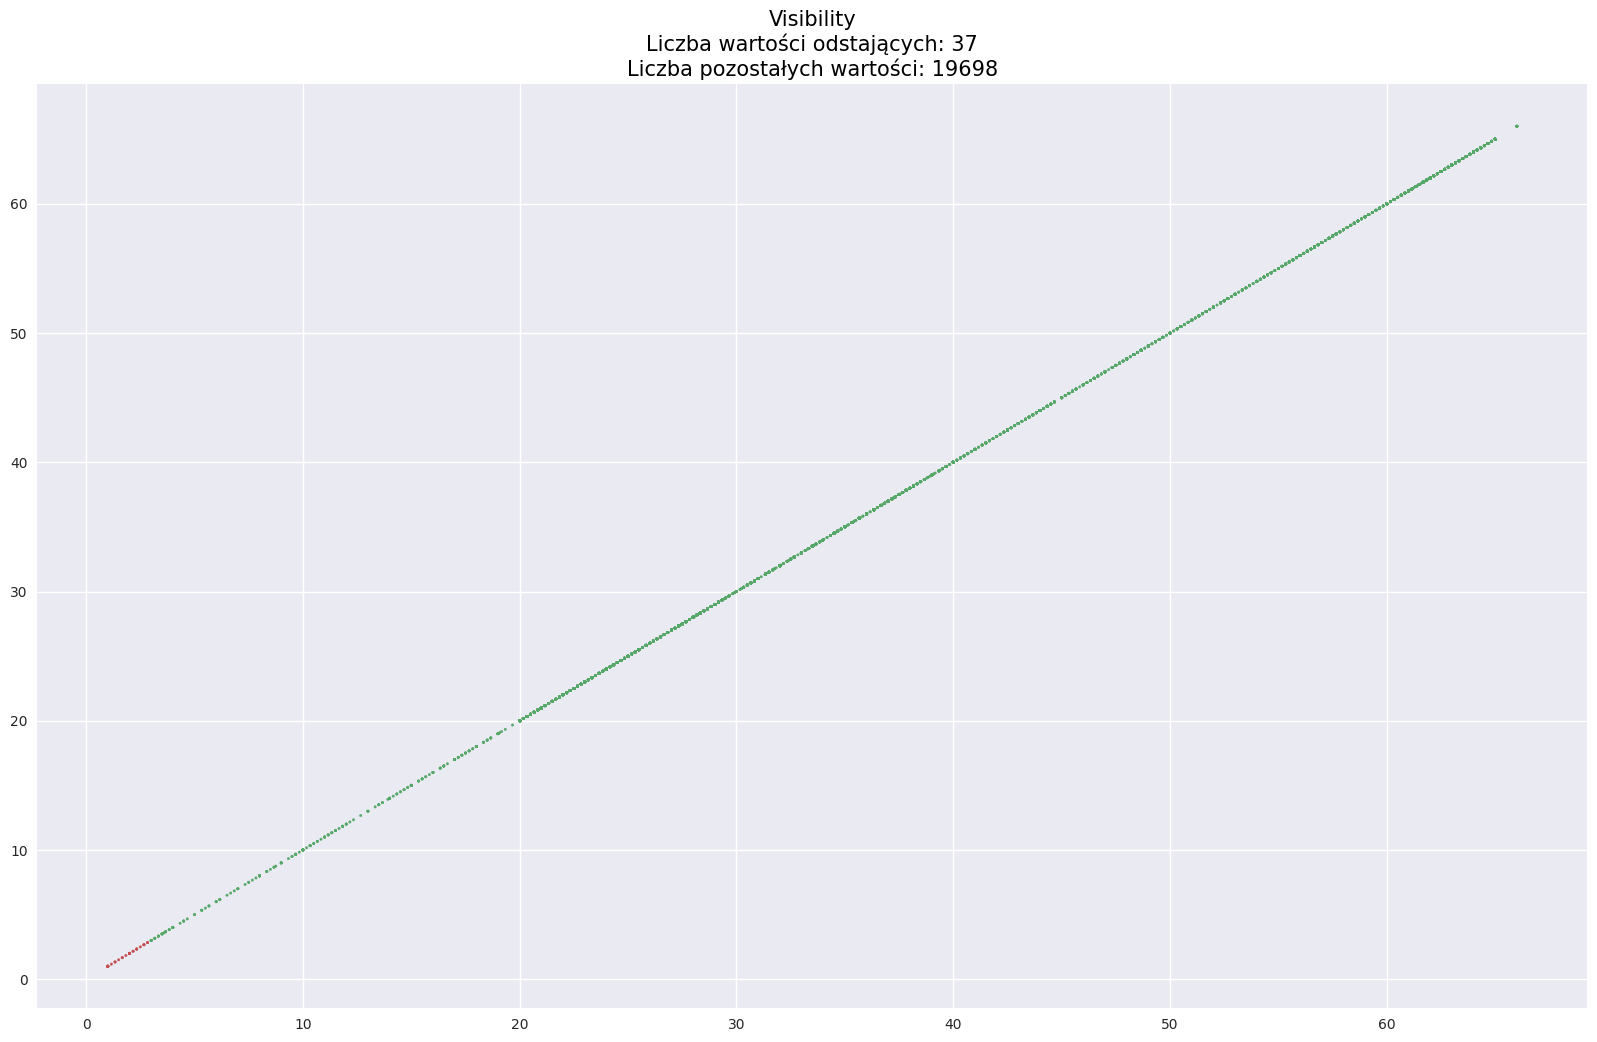

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


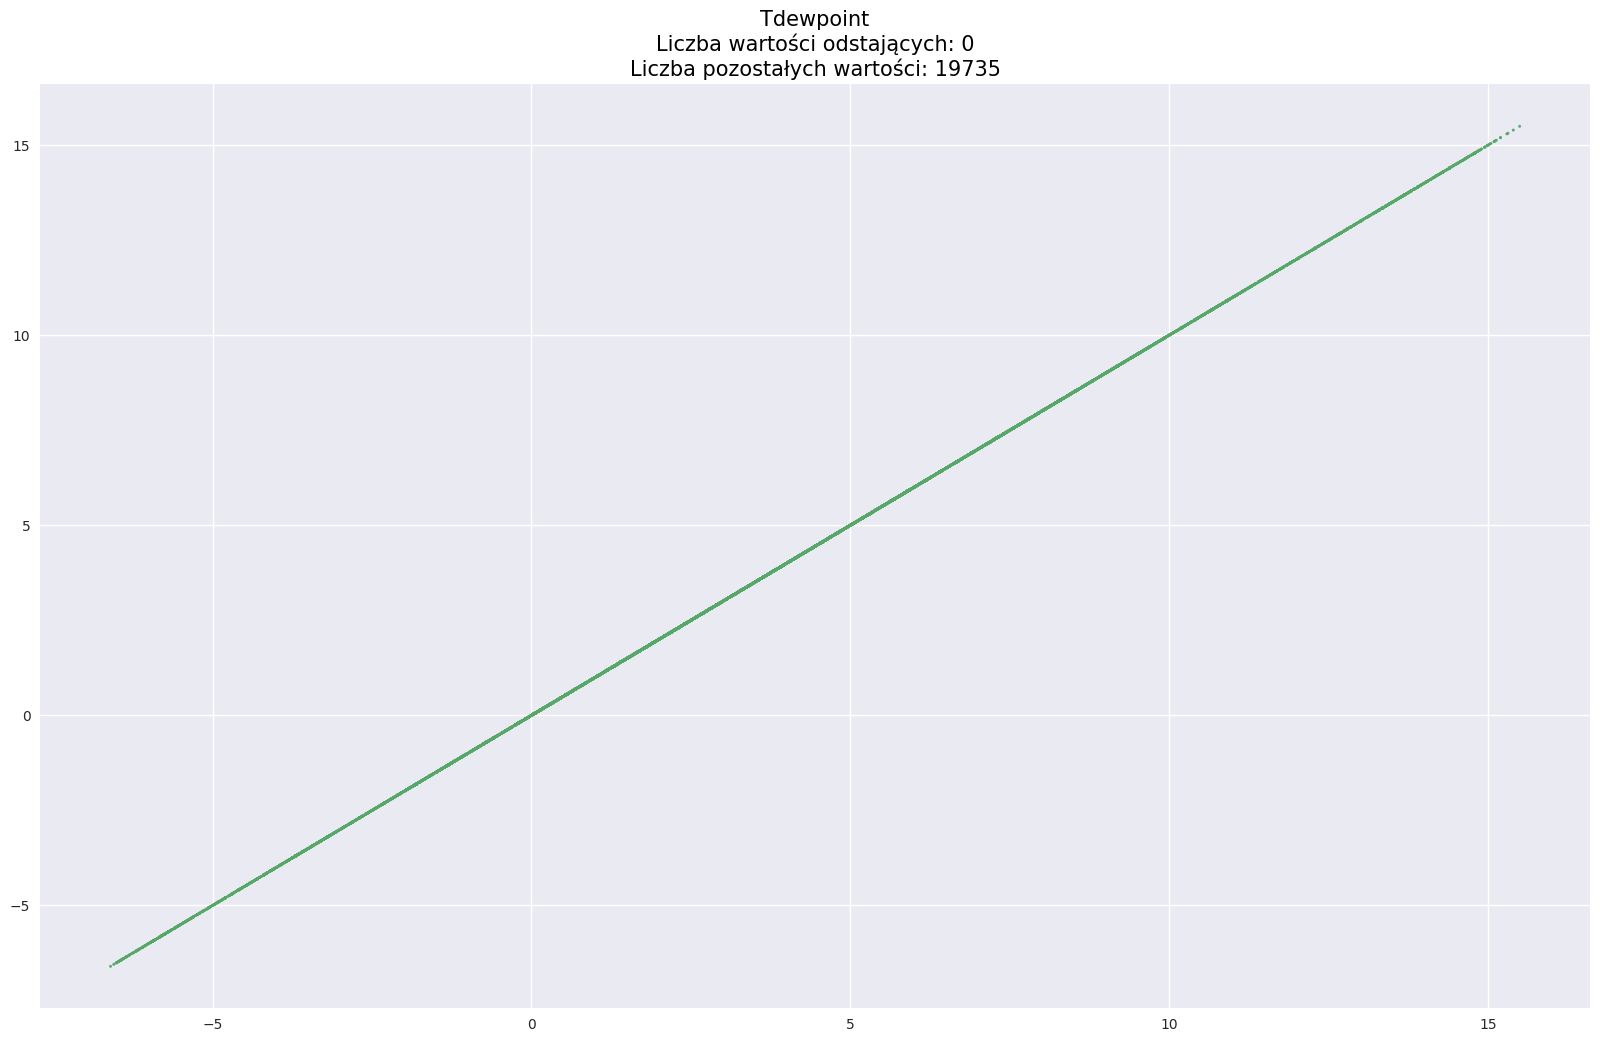

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


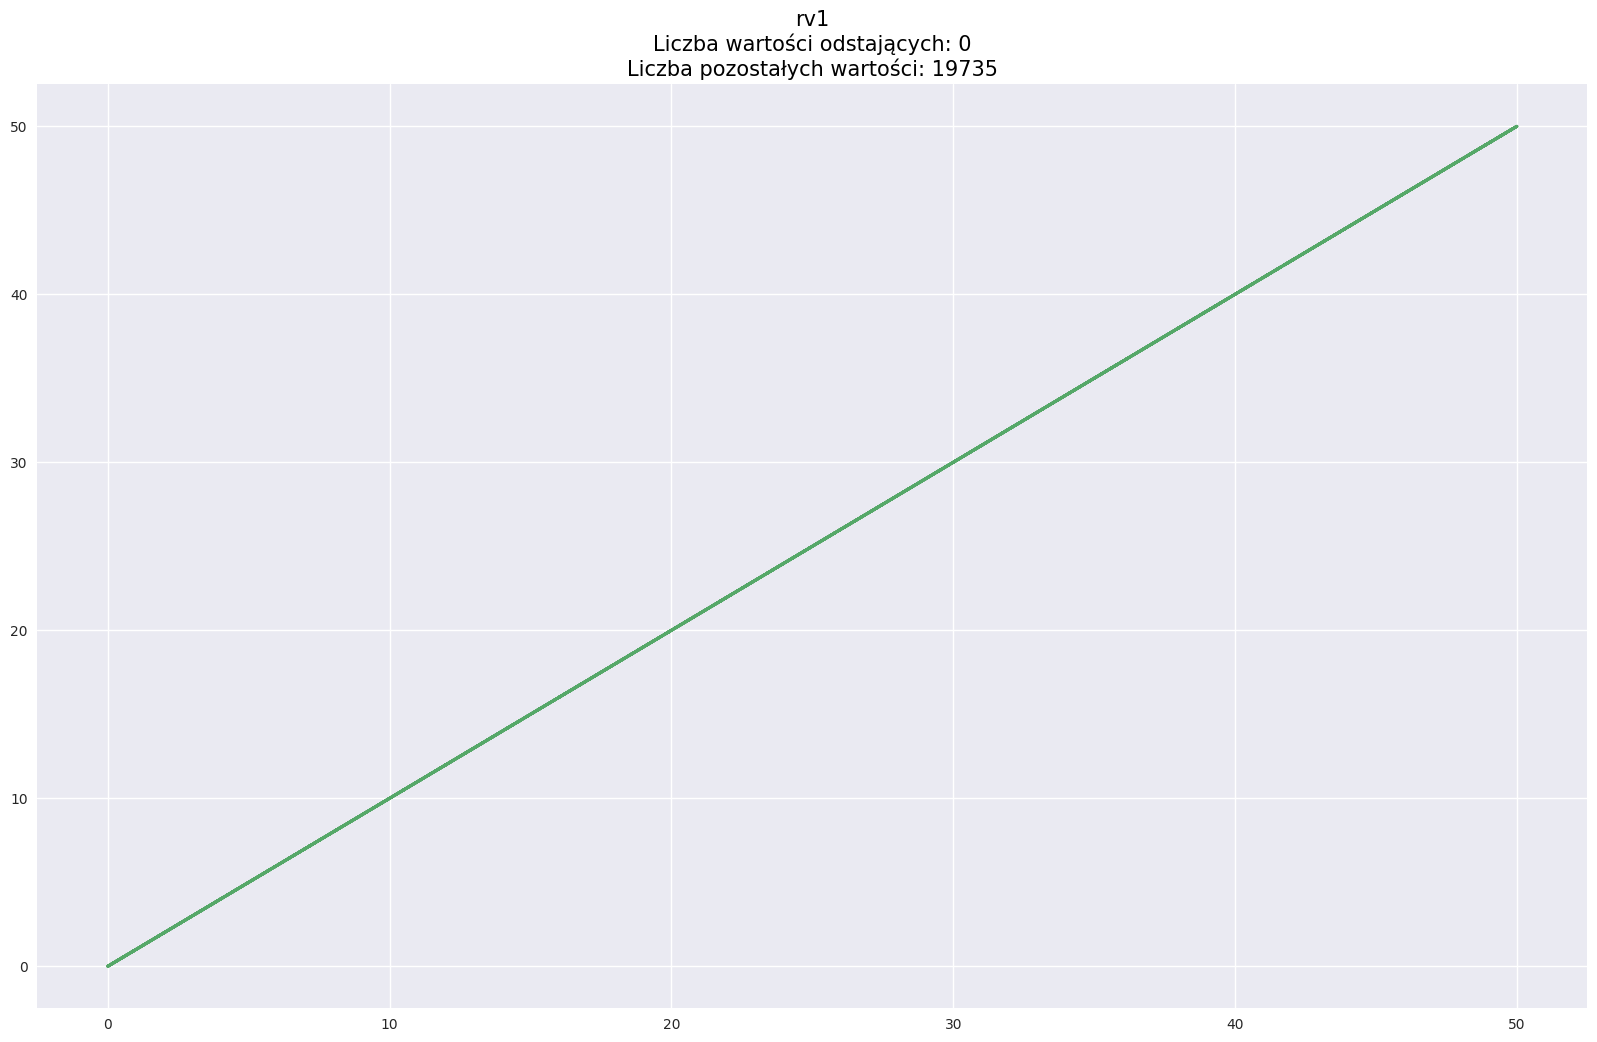

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


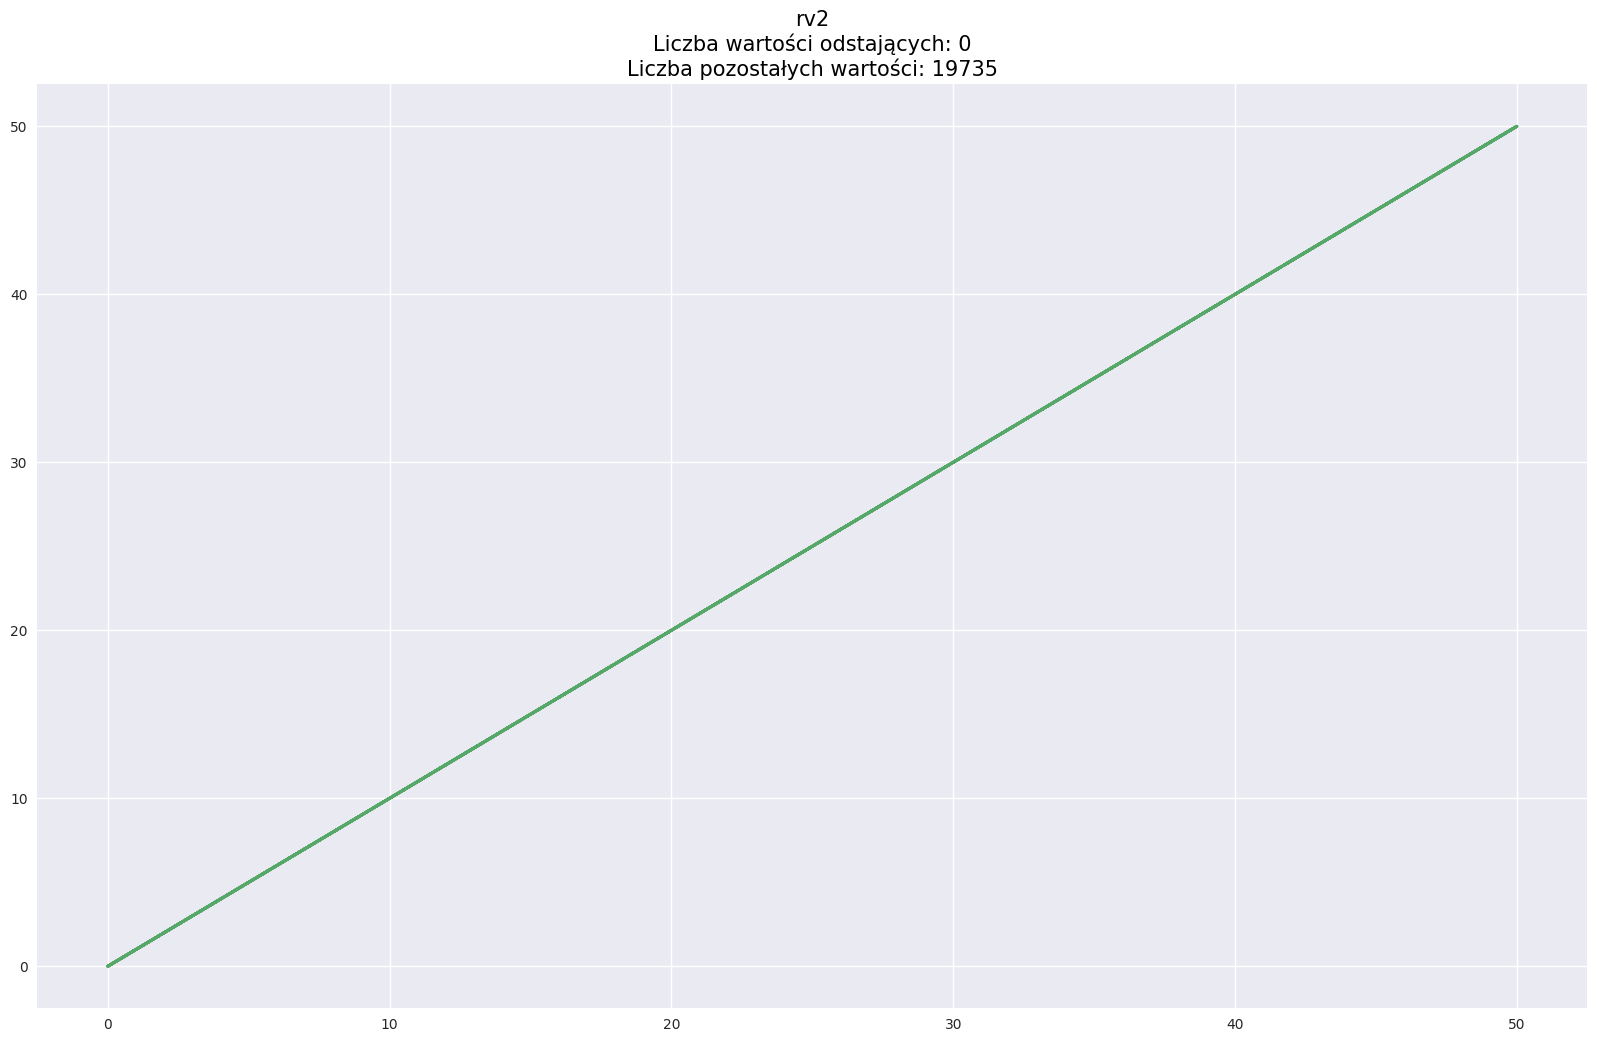

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


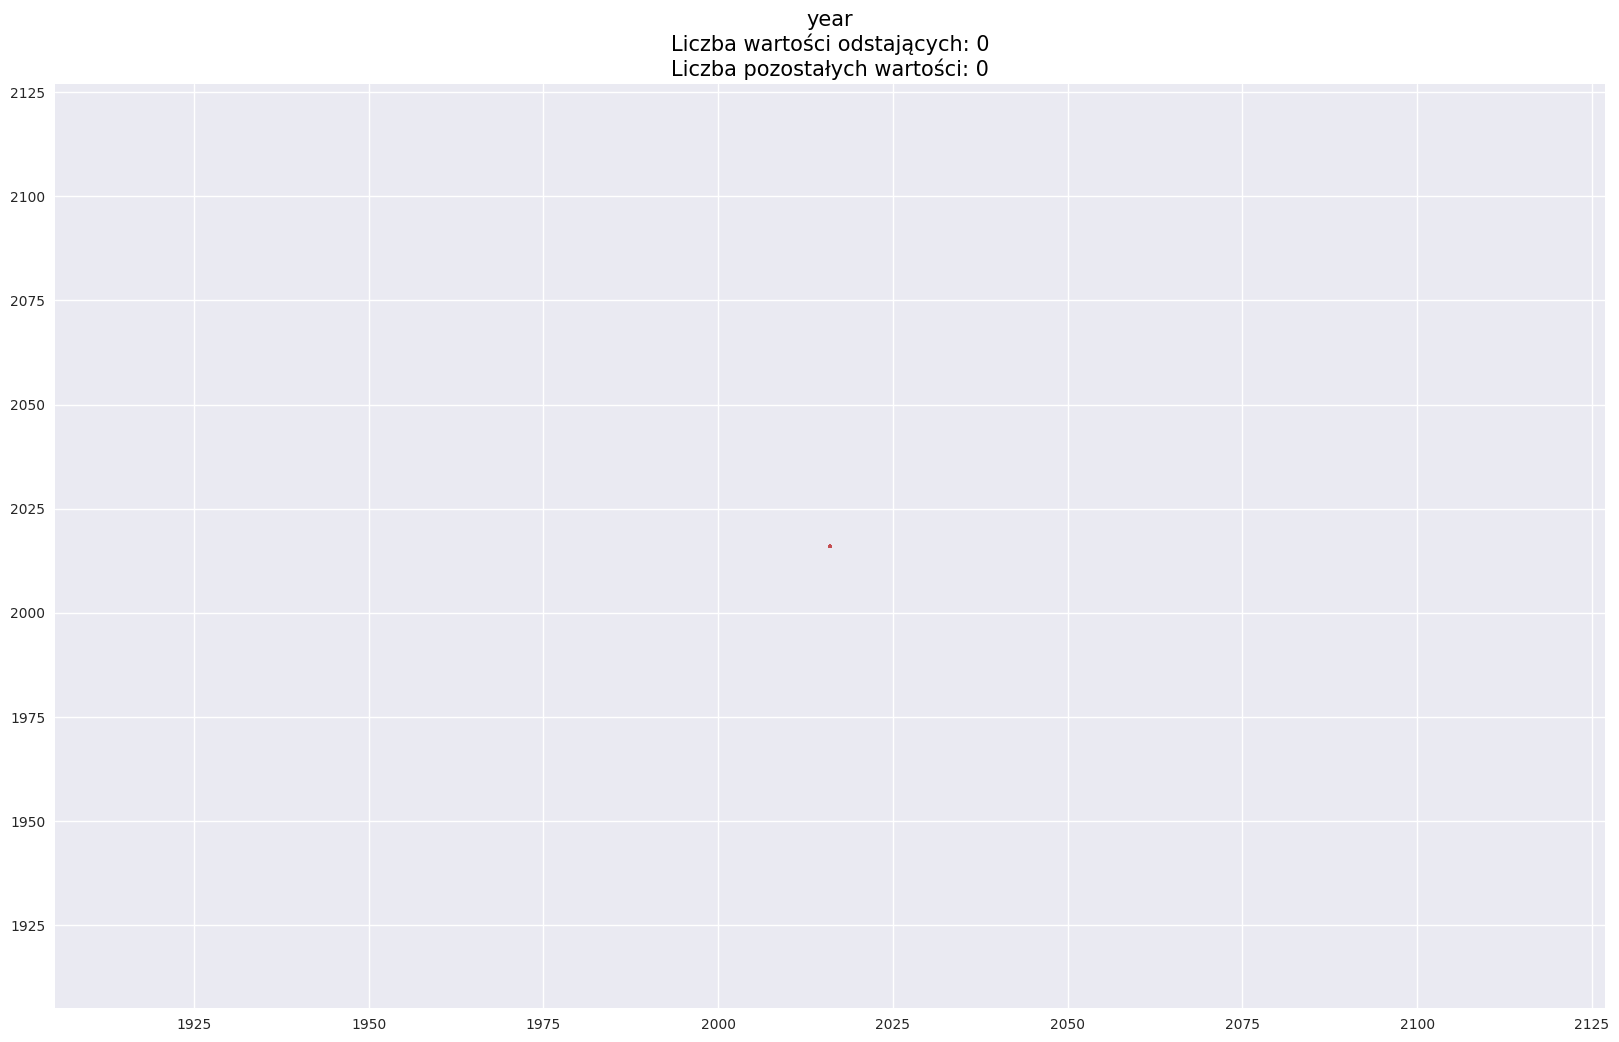

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


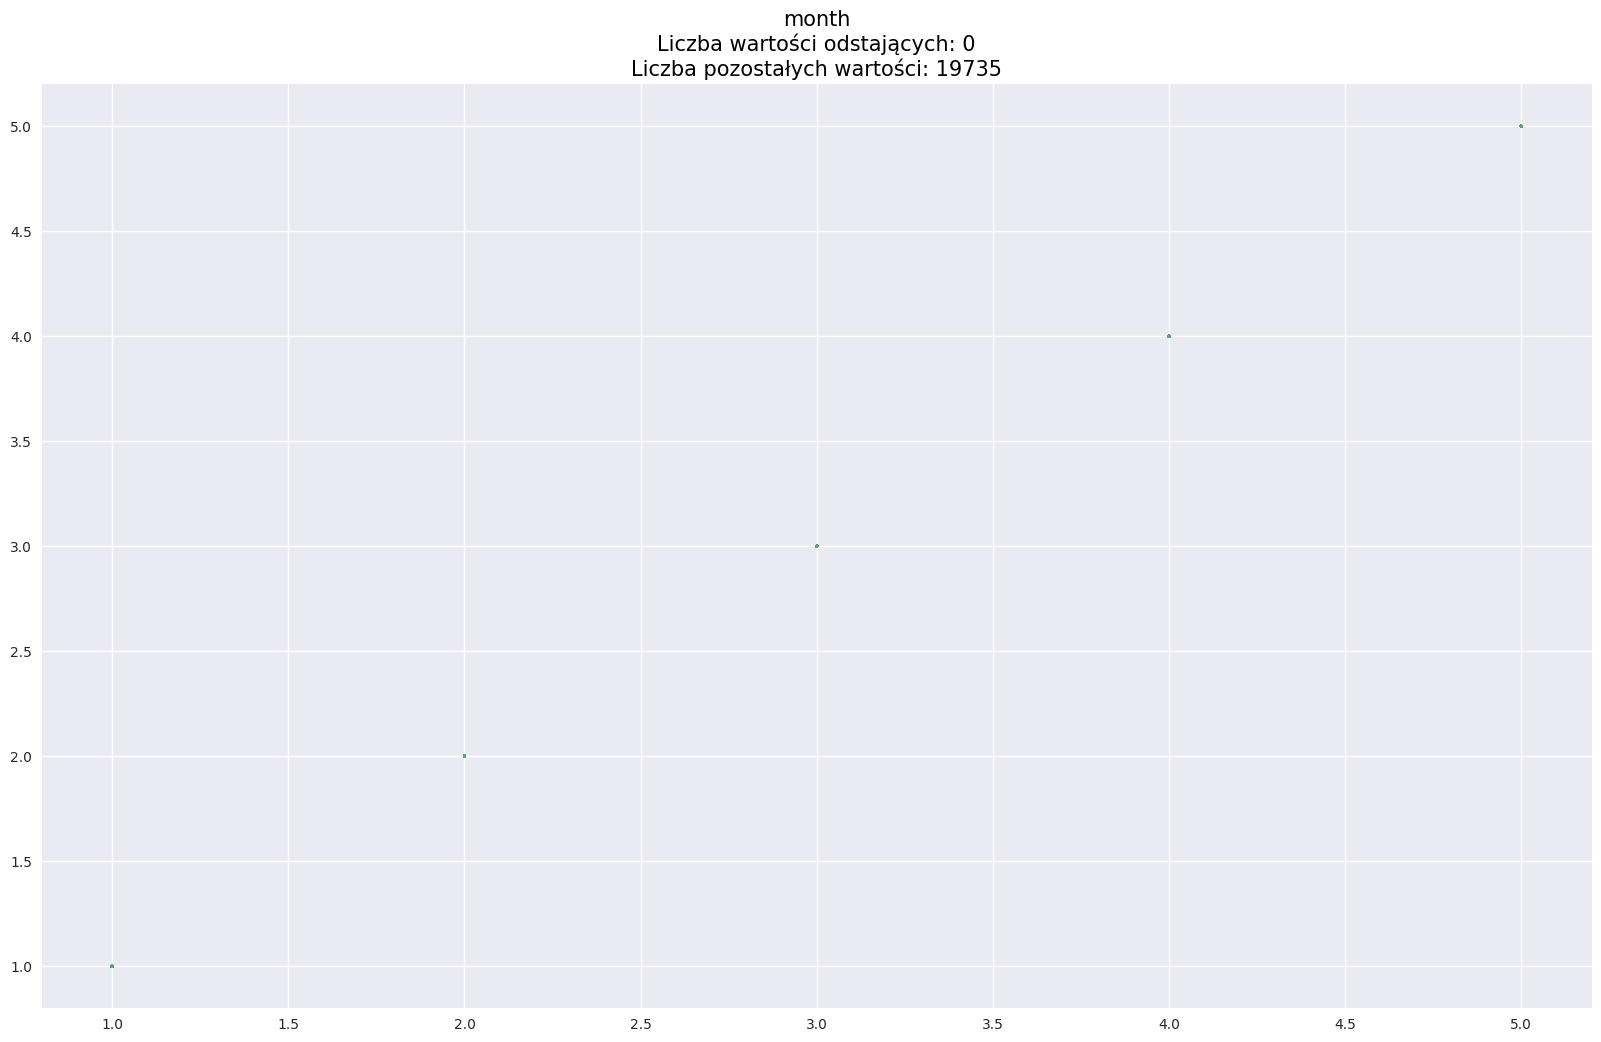

/tmp/ipykernel_83/4063011999.py:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


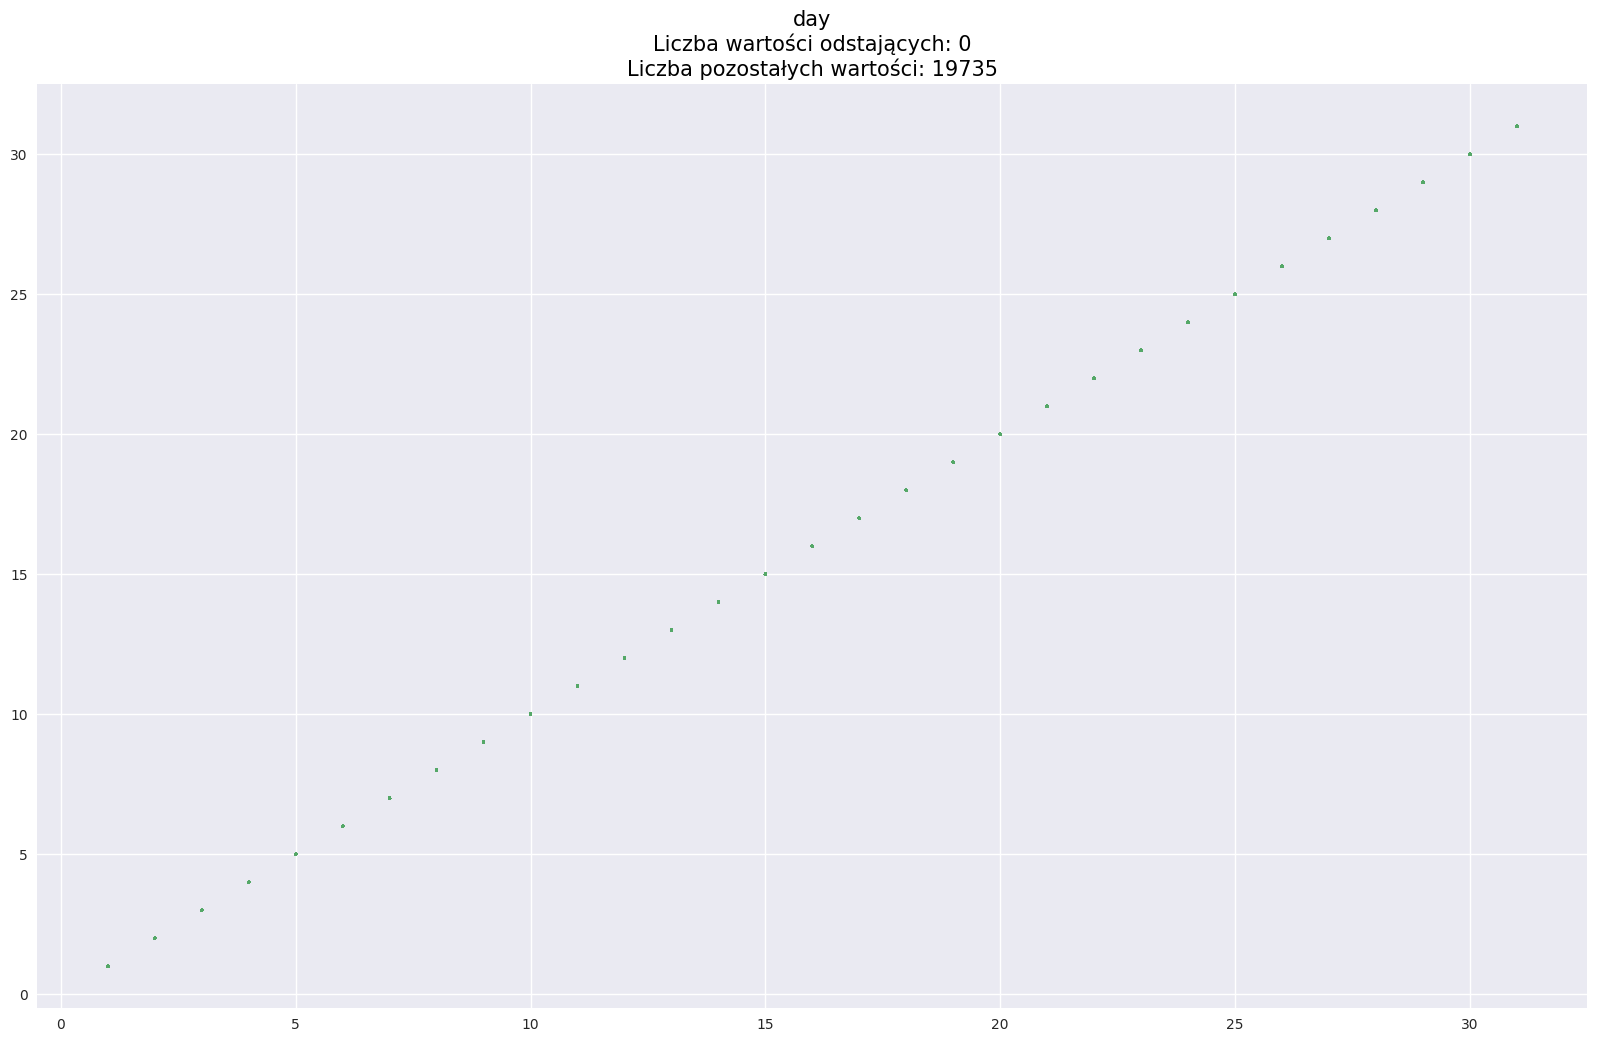

In [12]:
#wizualicja wartości odstających kolumny od indexu względem samej siebie, w celu zidentyfikowania wartości odstających (Z-score)

column_names = list(df.columns.values)
colToIndex = []


for i in range(len(column_names)-4):
    index = i

    column = column_names[index]

    upper_limit = df[column].mean() + 3*df[column].std()
    lower_limit = df[column].mean() - 3*df[column].std()

    #ustawienia grafu
    plt.figure(figsize=(20,12))
    sns.color_palette("flare", as_cmap=True)
    plt.style.use('seaborn')

    #wyświetlenie grafu z inna kolorystyką w zależności od odstawania od średniej
    col = np.where(df[column]>lower_limit,np.where(df[column]<upper_limit,'g','r'),'r')
    plt.scatter(df[column], df[column],s=3,c=col)
    plt.title(column)
    
    #zapis do pliku

    valAbove = df[column][df[column]>upper_limit].count()

    valUnder = df[column][df[column]<lower_limit].count()
    valIn = df[column][df[column]<upper_limit].count() - valUnder;
    valOutliners = valAbove + valUnder;

    
    if valOutliners > 0:
        colToIndex.append(column)


    plt.title(column + "\n" + "Liczba wartości odstających: " + str(valOutliners) + "\n" + "Liczba pozostałych wartości: " + str(valIn),fontdict=dict(color='black',size=15))
    plt.show()
    plt.close

### Assigning outlier values to be equal to a limit

In [13]:
for colIndex in colToIndex:

  upper_limit = df[colIndex].mean() + 3*df[colIndex].std()
  lower_limit = df[colIndex].mean() - 3*df[colIndex].std()

  for index,row in df.iterrows():
    if(df.loc[index,colIndex]<lower_limit):
      df.loc[index,colIndex] = lower_limit
    else:
      if(df.loc[index,colIndex]>upper_limit):
        df.loc[index,colIndex] = upper_limit

# Feature selection

Model quality based on: RMSE & R-squared

In [14]:
df_fe = df

In [15]:
X_fe, y_fe = df_fe.loc[:, (df_fe.columns != 'rv2') & (df_fe.columns != 'rv1')], df_fe['rv2']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt

cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X_fe, y_fe, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_fe,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_fe,y_pred),2))) 

RMSE: 15.18
R_squared: -0.1


## Filter feature by variance

In [17]:
df_fe.var()

Appliances     7202.971860
lights           55.636781
T1                2.579005
RH_1             15.623217
T2                4.677933
RH_2             16.187819
T3                4.012451
RH_3             10.583893
T4                4.173377
RH_4             18.847065
T5                3.399429
RH_5             70.167515
T6               36.898046
RH_6            970.310406
T7                4.452072
RH_7             26.143198
T8                3.826569
RH_8             27.292906
T9                4.059066
RH_9             17.234930
T_out            28.086039
Press_mm_hg      54.310042
RH_out          218.890752
Windspeed         5.934475
Visibility      138.957856
Tdewpoint        17.595070
rv1             210.152393
rv2             210.152393
year              0.000000
month             1.793458
day              71.419375
hour             47.913432
minute          291.698336
dow               3.942677
doy            1565.384739
dtype: float64

## Filter feature by correlation

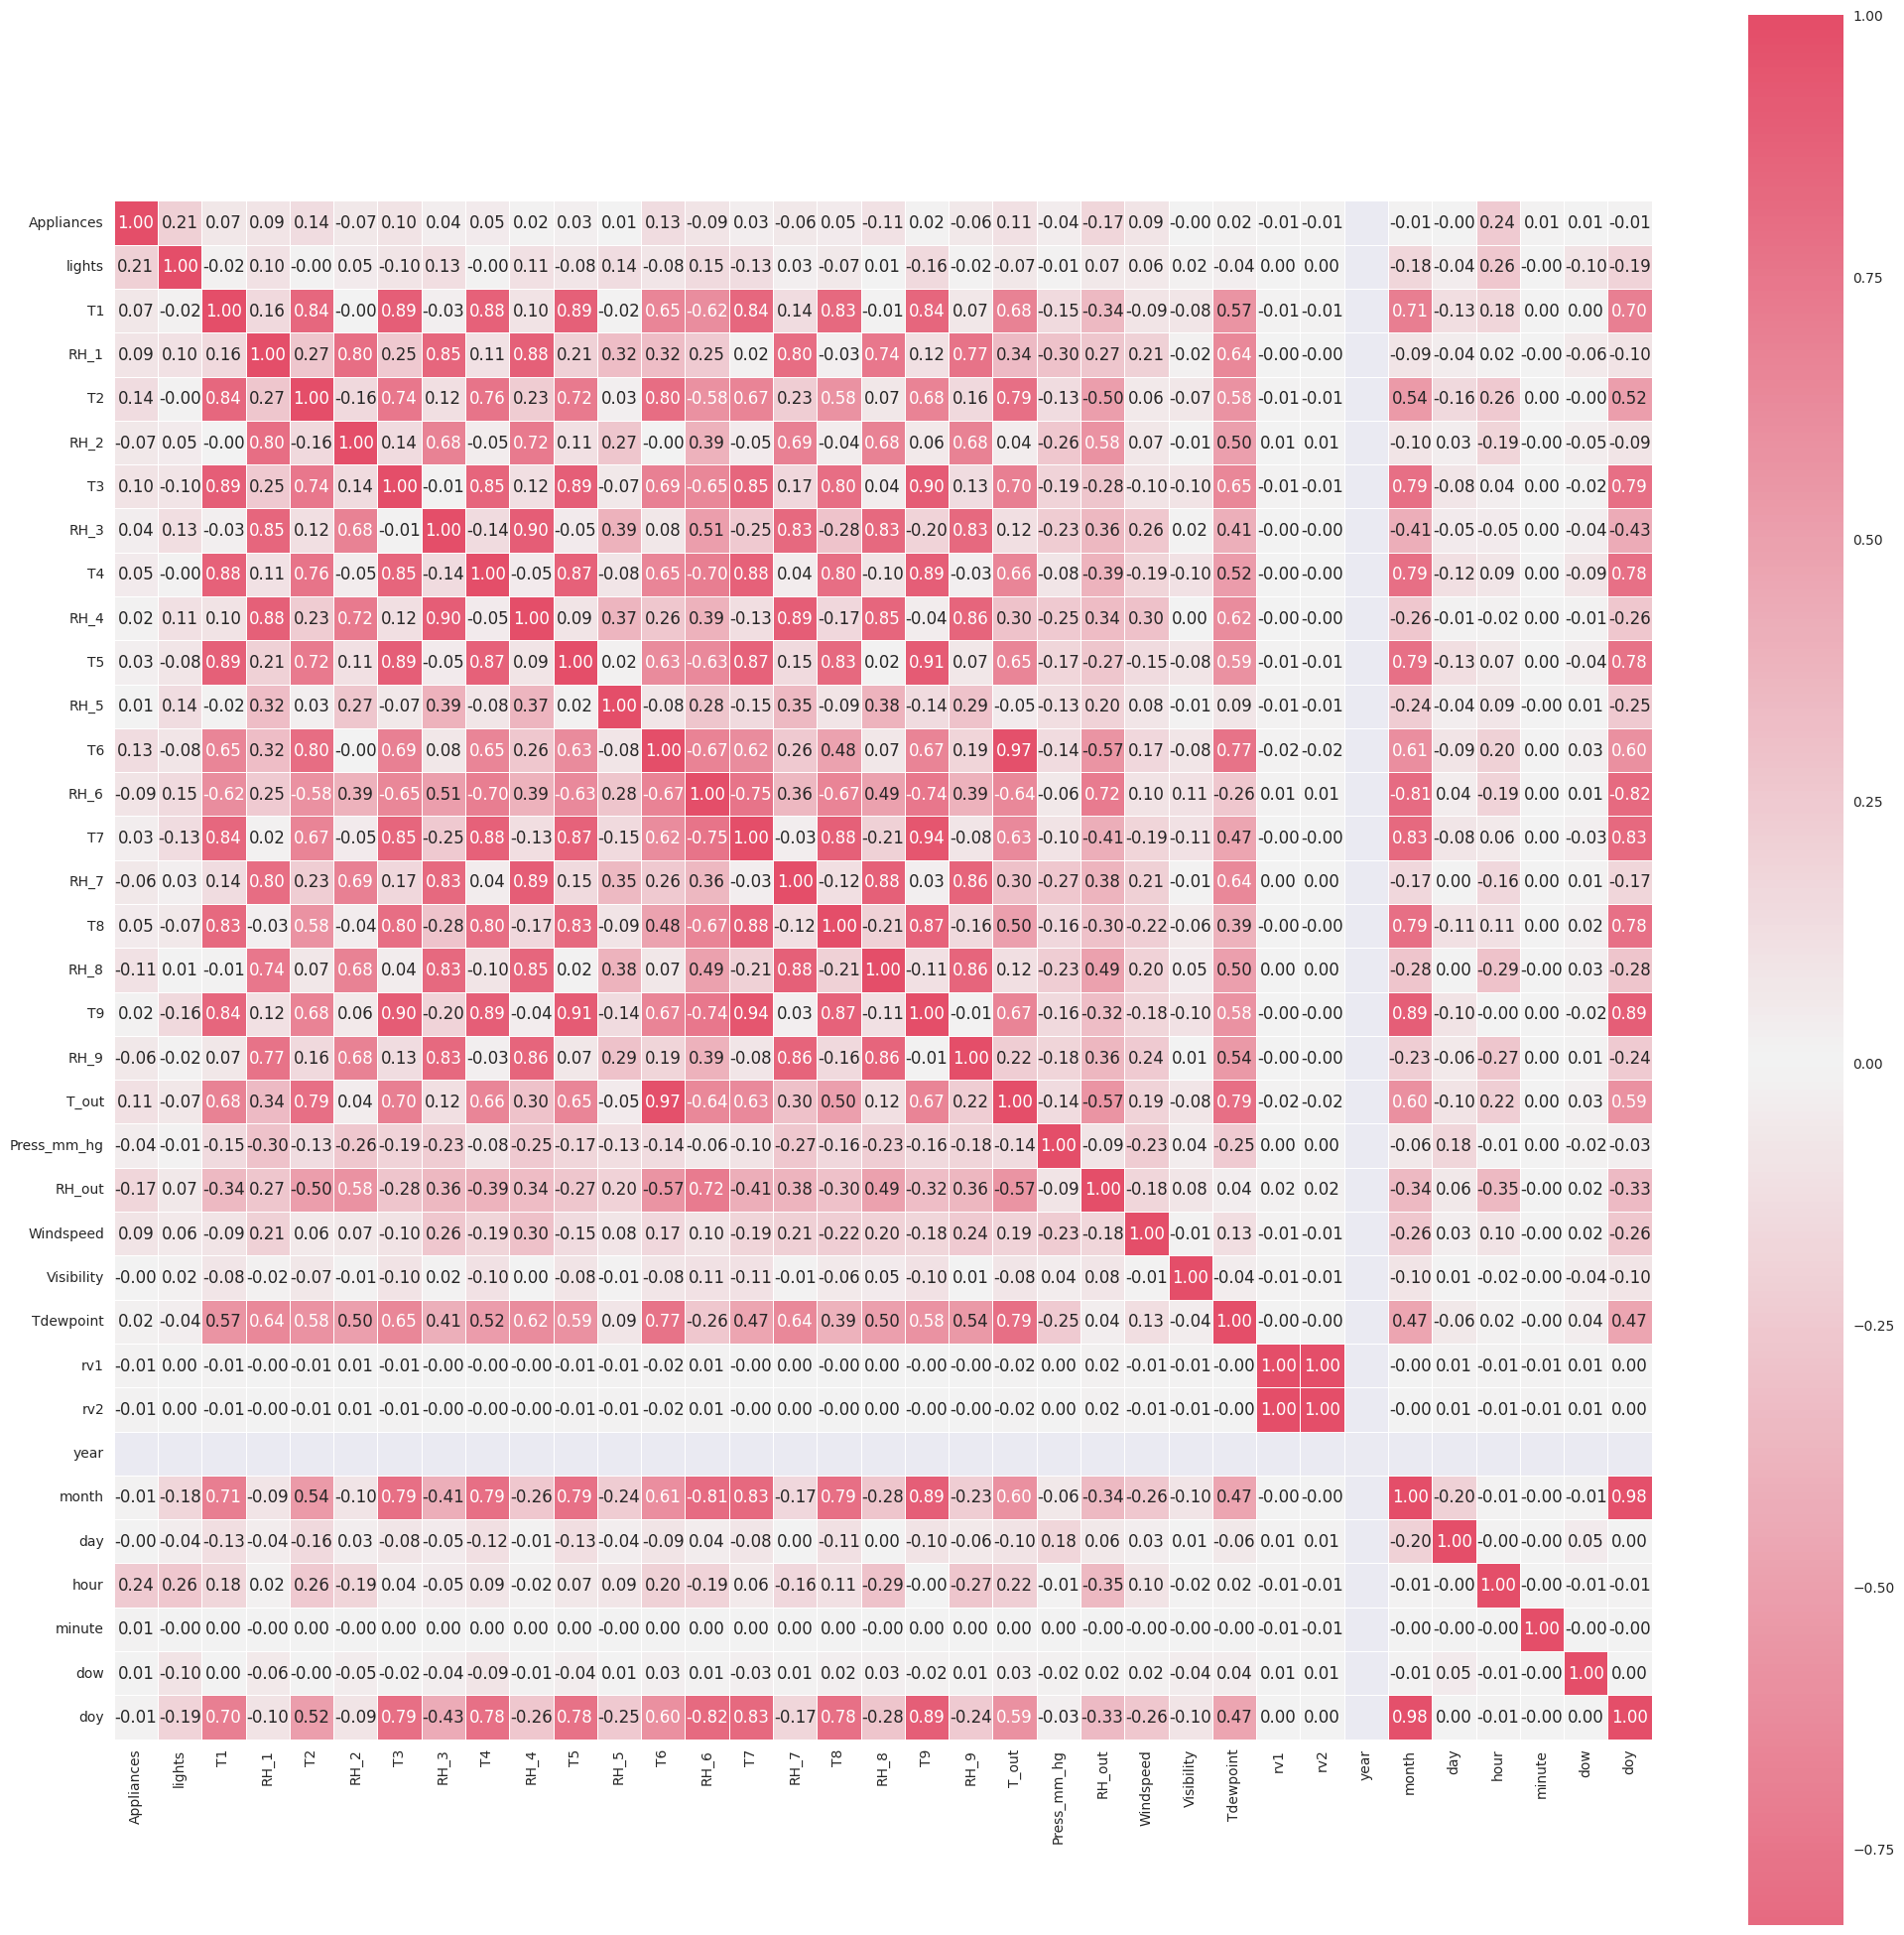

In [18]:
def correlation_heatmap(train):

    fig, ax = plt.subplots(figsize=(25,25))
    rdgn = sns.diverging_palette(h_neg=5, h_pos=5, s=70, l=55, sep=3, as_cmap=True)
    sns.heatmap(train.corr(),cmap=rdgn,  vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True)
    plt.show();

correlation_heatmap(df_fe)

In [19]:
abs(df_fe.corr()["Appliances"])

Appliances     1.000000
lights         0.212289
T1             0.069369
RH_1           0.089592
T2             0.136309
RH_2           0.067586
T3             0.096678
RH_3           0.037474
T4             0.049903
RH_4           0.016963
T5             0.029731
RH_5           0.007700
T6             0.132713
RH_6           0.094798
T7             0.033446
RH_7           0.061766
T8             0.051582
RH_8           0.106470
T9             0.017250
RH_9           0.061346
T_out          0.113229
Press_mm_hg    0.041193
RH_out         0.169128
Windspeed      0.093979
Visibility     0.001667
Tdewpoint      0.020576
rv1            0.010260
rv2            0.010260
year                NaN
month          0.006566
day            0.000832
hour           0.243418
minute         0.011845
dow            0.006813
doy            0.006702
Name: Appliances, dtype: float64

## Feature Selection Using a Wrapper

In [20]:
!pip install mlxtend==0.22.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.5 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [21]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X_fe, y_fe)

print("Selected features TOP 10:")
mask = selector.get_support()  
selected_features = X_fe.columns[mask]  
for feature in selected_features:
    print(feature)


Selected features TOP 10:
Appliances
T2
RH_5
T6
RH_6
T_out
RH_out
Windspeed
day
hour


/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


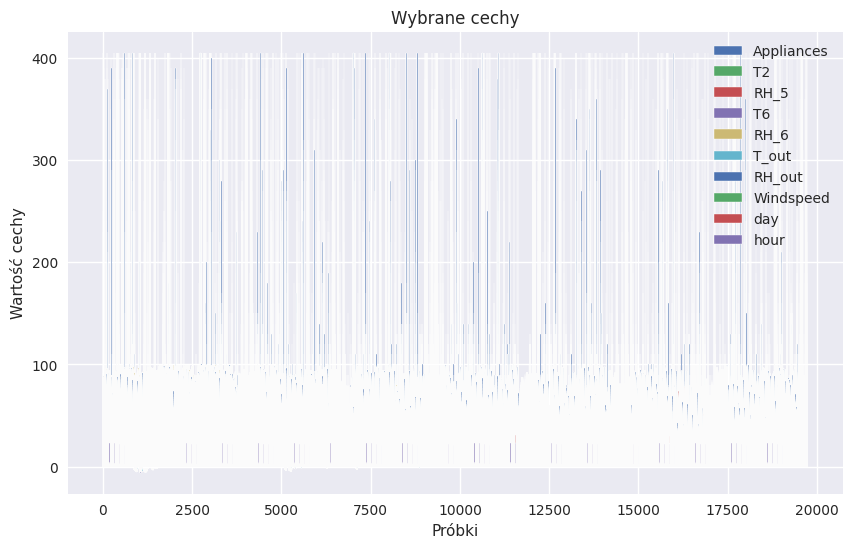

In [22]:
selected_indices = [X_fe.columns.get_loc(feature) for feature in selected_features]

plt.figure(figsize=(10, 6))
for i, feature in enumerate(selected_features):
    plt.bar(range(len(X_fe)), X_fe.iloc[:, selected_indices[i]], label=feature)

plt.xlabel('Próbki')
plt.ylabel('Wartość cechy')
plt.title('Wybrane cechy')
plt.legend()
plt.show()

In [23]:
print(selected_features)

Index(['Appliances', 'T2', 'RH_5', 'T6', 'RH_6', 'T_out', 'RH_out',
       'Windspeed', 'day', 'hour'],
      dtype='object')


## Data normalization

In [24]:
print(column_names)

['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'year', 'month', 'day', 'hour', 'minute', 'dow', 'doy']


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_new_normalized = scaler.fit_transform(X_new)

In [26]:
df_normalized = pd.DataFrame(X_new_normalized, columns=selected_features)

In [27]:
df_normalized.head()

Appliances        T2      RH_5        T6      RH_6     T_out    RH_out  \
0   -0.398792 -0.523522  0.528602 -0.144734  0.951798 -0.152099  0.825753   
1   -0.398792 -0.523522  0.528602 -0.176562  0.945592 -0.174113  0.825753   
2   -0.516621 -0.523522  0.515470 -0.221561  0.916484 -0.196128  0.825753   
3   -0.516621 -0.523522  0.515470 -0.242414  0.925045 -0.218143  0.825753   
4   -0.398792 -0.523522  0.515470 -0.253390  0.972238 -0.240157  0.825753   

   Windspeed       day      hour  
0   1.217102 -0.598455  0.794304  
1   1.080267 -0.598455  0.794304  
2   0.943431 -0.598455  0.794304  
3   0.806596 -0.598455  0.794304  
4   0.669760 -0.598455  0.794304

## Summary of RMSE & R-squared

In [28]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
y_pred = cross_val_predict(classifier_pipeline, X_new_normalized, y_fe, cv=cv)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_fe,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_fe,y_pred),2))) 

RMSE: 15.15
R_squared: -0.09


# Model building

## Creating train, test and validation subsets [70 - 20 - 10]

In [29]:
X = df_normalized.drop('Appliances', axis=1)
y = df_normalized['Appliances']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

In [31]:
print(f'Train data: {X_train.shape, y_train.shape}')
print(f'Test data: {X_test.shape, y_test.shape}')
print(f'Validation data: {X_val.shape, y_val.shape}')

Train data: ((13814, 9), (13814,))
Test data: ((3967, 9), (3967,))
Validation data: ((1954, 9), (1954,))


## Linear regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lr = LinearRegression() 
lr.fit(X_train, y_train)

param_grid = {
    'normalize': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_val, y_val)

best_params = grid_search.best_params_


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import 

In [33]:
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))
lr.set_params(**best_params)
lr.fit(X_train_val, y_train_val)
lrFS =lr

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [34]:
y_pred = lr.predict(X_test)
print(y_test.shape, y_pred.shape)

print(f'Training R2 score (LR): {r2_score(y_train, lr.predict(X_train))}')
print(f'Validation R2 Score (LR): {r2_score(y_test, y_pred)}')

(3967,) (3967,)
Training R2 score (LR): 0.08573326639045131
Validation R2 Score (LR): 0.08272362239846998
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [35]:
mse = mean_squared_error(y_test, y_pred)
print("MSE na zbiorze testowym:", mse)

MSE na zbiorze testowym: 0.8567100427067693


## Actual and predictive level of appliances energy

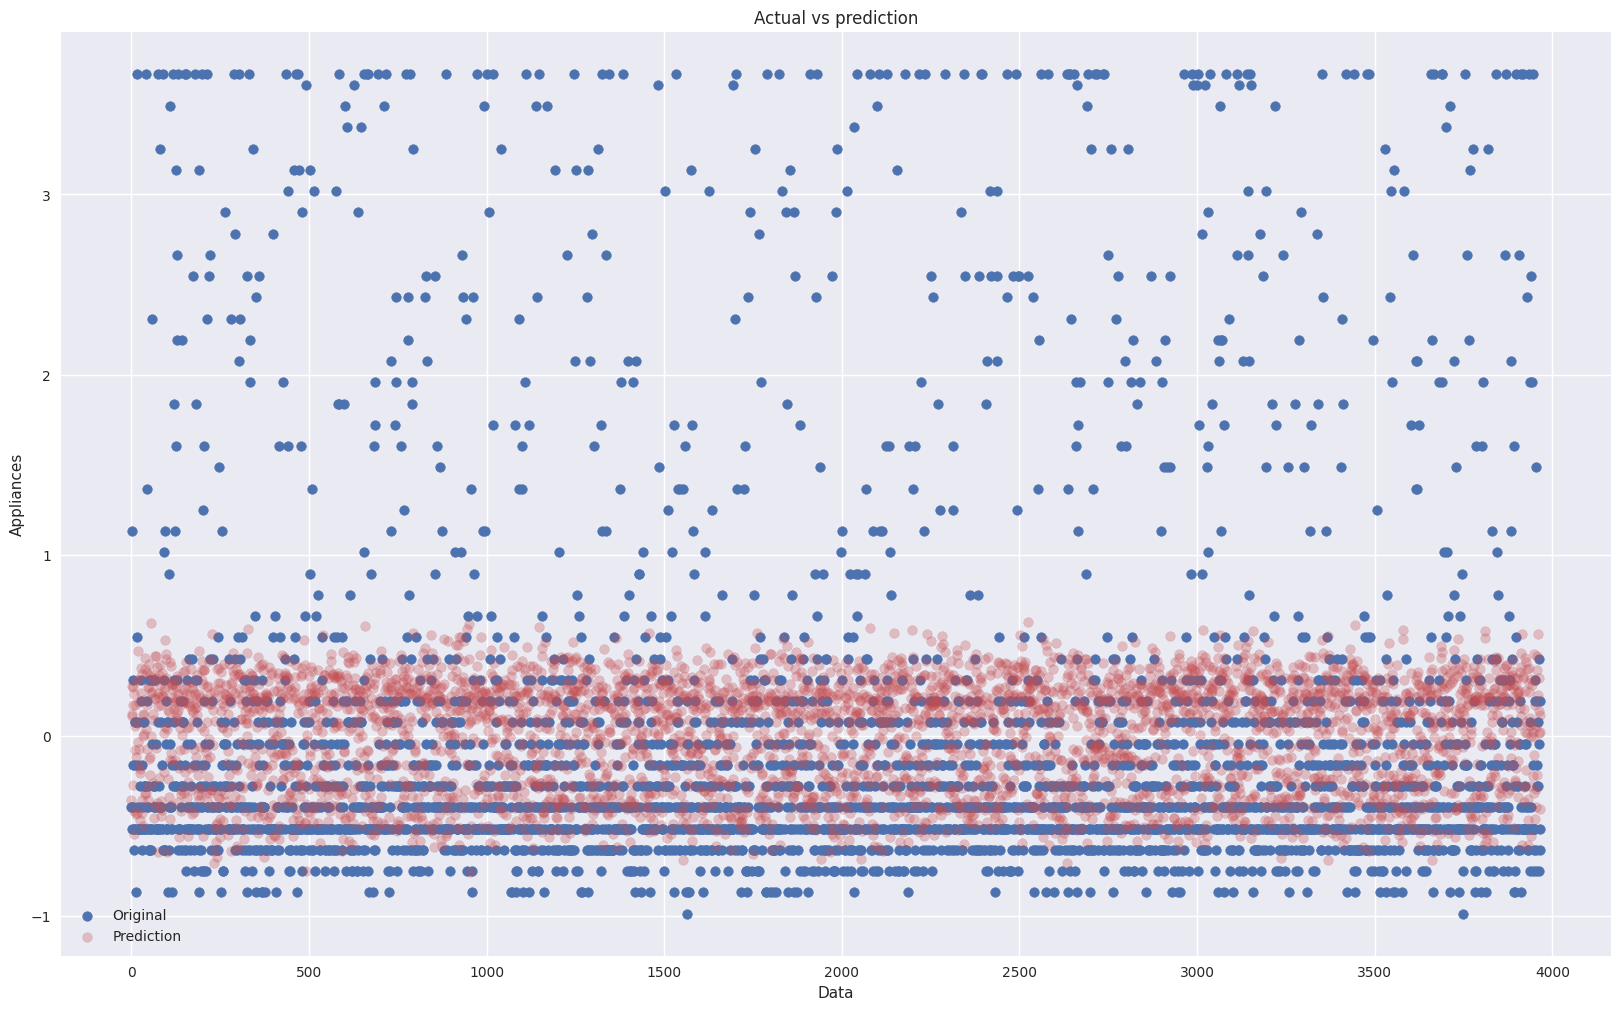

In [36]:
plt.figure(figsize=(20, 12))
plt.scatter(range(len(y_test)), y_test, color='b', label='Original')
plt.scatter(range(len(y_test)), y_pred, color='r', alpha=0.3, label='Prediction')
plt.xlabel('Data')
plt.ylabel('Appliances')
plt.title('Actual vs prediction')
plt.legend()
plt.show()

# Model based on original data

In [37]:
from sklearn.preprocessing import StandardScaler
df_temp = df
scaler = StandardScaler()
df_temp = scaler.fit_transform(df_temp)


In [38]:
display(df_temp)

array([[-0.39879169,  3.20935684, -1.1187688 , ..., -1.46373356,
        -1.49944488, -1.73725253],
       [-0.39879169,  3.20935684, -1.1187688 , ..., -0.87821046,
        -1.49944488, -1.73725253],
       [-0.51662149,  3.20935684, -1.1187688 , ..., -0.29268737,
        -1.49944488, -1.73725253],
       ...,
       [ 2.07563413,  0.84841462,  2.37462657, ...,  0.87835881,
         0.51509285,  1.72549655],
       [ 3.66951349,  0.84841462,  2.37462657, ...,  1.4638819 ,
         0.51509285,  1.72549655],
       [ 3.66951349,  0.84841462,  2.37462657, ..., -1.46373356,
         0.51509285,  1.72549655]])

In [39]:
df_normalized_w = pd.DataFrame(df_temp,columns=column_names)

In [40]:
display(df_normalized_w)

Appliances    lights        T1      RH_1        T2      RH_2        T3  \
0       -0.398792  3.209357 -1.118769  1.858034 -0.523522  1.083429 -1.236437   
1       -0.398792  3.209357 -1.118769  1.629488 -0.523522  1.066652 -1.236437   
2       -0.516621  3.209357 -1.118769  1.529973 -0.523522  1.042832 -1.236437   
3       -0.516621  3.209357 -1.118769  1.470939 -0.523522  1.033719 -1.236437   
4       -0.398792  3.209357 -1.118769  1.538407 -0.523522  1.018806 -1.236437   
...           ...       ...       ...       ...       ...       ...       ...   
19730    0.072528 -0.492280  2.416140  1.595754  2.569693  0.396361  2.462904   
19731   -0.045302 -0.492280  2.374627  1.580574  2.506812  0.409854  2.429621   
19732    2.075634  0.848415  2.374627  1.605031  2.448818  0.581000  2.388018   
19733    3.669513  0.848415  2.374627  1.704545  2.349608  0.647469  2.308141   
19734    3.669513  0.848415  2.374627  1.605874  2.280386  0.631420  2.274858   

           RH_3        T4      RH_4  ...  Tdewpoint       rv1       rv2  year  \
0      1.686862 -0.908217  1.506438  ...   0.366975 -0.807974 -0.807974   0.0   
1      1.705305 -0.908217  1.604528  ...   0.343135 -0.440240 -0.440240   0.0   
2      1.749364 -0.944115  1.580918  ...   0.319294  0.252109  0.252109   0.0   
3      1.769857 -0.962063  1.542526  ...   0.295454  1.408801  1.408801   0.0   
4      1.769857 -0.962063  1.497991  ...   0.271613 -1.028122 -1.028122   0.0   
...         ...       ...       ...  ...        ...       ...       ...   ...   
19730  0.590508  1.882026  1.511812  ...   2.282163  1.249203  1.249203   0.0   
19731  0.608951  1.882026  1.511812  ...   2.274216  1.675942  1.675942   0.0   
19732  0.752399  1.882026  1.544061  ...   2.266269  0.290494  0.290494   0.0   
19733  0.629444  1.882026  1.557883  ...   2.258322 -1.287590 -1.287590   0.0   
19734  0.588458  1.882026  1.597810  ...   2.250375  0.629874  0.629874   0.0   

          month       day      hour    minute       dow       doy  
0     -1.569369 -0.598455  0.794304 -1.463734 -1.499445 -1.737253  
1     -1.569369 -0.598455  0.794304 -0.878210 -1.499445 -1.737253  
2     -1.569369 -0.598455  0.794304 -0.292687 -1.499445 -1.737253  
3     -1.569369 -0.598455  0.794304  0.292836 -1.499445 -1.737253  
4     -1.569369 -0.598455  0.794304  0.878359 -1.499445 -1.737253  
...         ...       ...       ...       ...       ...       ...  
19730  1.417563  1.294861  0.794304 -0.292687  0.515093  1.725497  
19731  1.417563  1.294861  0.794304  0.292836  0.515093  1.725497  
19732  1.417563  1.294861  0.794304  0.878359  0.515093  1.725497  
19733  1.417563  1.294861  0.794304  1.463882  0.515093  1.725497  
19734  1.417563  1.294861  0.938776 -1.463734  0.515093  1.725497  

[19735 rows x 35 columns]

In [41]:
Xo = df_normalized_w.drop('Appliances', axis=1)
yo = df_normalized_w['Appliances']

In [42]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.3, random_state=42)
Xo_test, Xo_val, yo_test, yo_val = train_test_split(Xo_test, yo_test, test_size=0.33, random_state=42)

In [43]:
lr = LinearRegression() 
lr.fit(Xo_train, yo_train)

param_grid = {
   'normalize': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(Xo_val, yo_val)

best_params = grid_search.best_params_

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import 

In [44]:
Xo_train_val = np.concatenate((Xo_train, Xo_val))
yo_train_val = np.concatenate((yo_train, yo_val))
lr.set_params(**best_params)
lr.fit(Xo_train_val, yo_train_val)

lrOg = lr

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [45]:
yo_pred = lr.predict(Xo_test)
print(y_test.shape, yo_pred.shape)

print(f'Training R2 score (LR): {r2_score(yo_train, lr.predict(Xo_train))}')
print(f'Validation R2 Score (LR): {r2_score(yo_test, yo_pred)}')

(3967,) (3967,)
Training R2 score (LR): 0.2002817990936474
Validation R2 Score (LR): 0.192824593289177
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [46]:
mse = mean_squared_error(yo_test, yo_pred)
print("MSE na zbiorze testowym:", mse)

MSE na zbiorze testowym: 0.7538788679626078


## Actual and predictive level of appliances energy

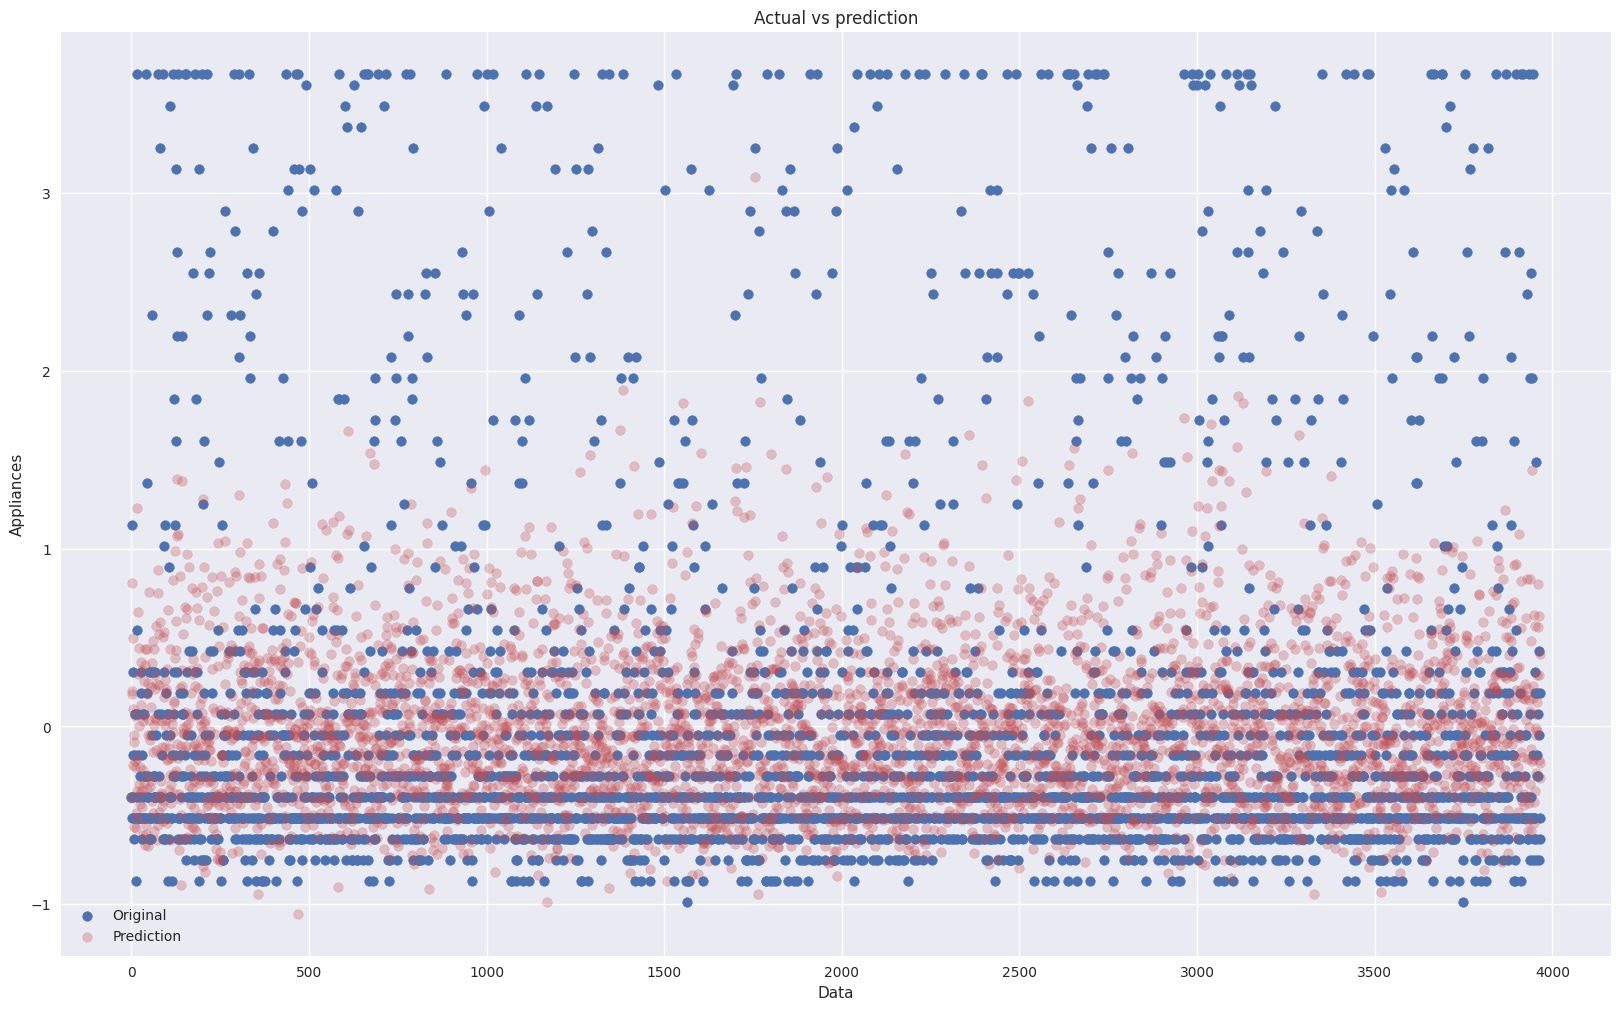

In [47]:
plt.figure(figsize=(20, 12))
plt.scatter(range(len(yo_test)), yo_test, color='b', label='Original')
plt.scatter(range(len(yo_test)), yo_pred, color='r', alpha=0.3, label='Prediction')
plt.xlabel('Data')
plt.ylabel('Appliances')
plt.title('Actual vs prediction')
plt.legend()
plt.show()

# Comparison of models

## Predictions to actual result scatter plot

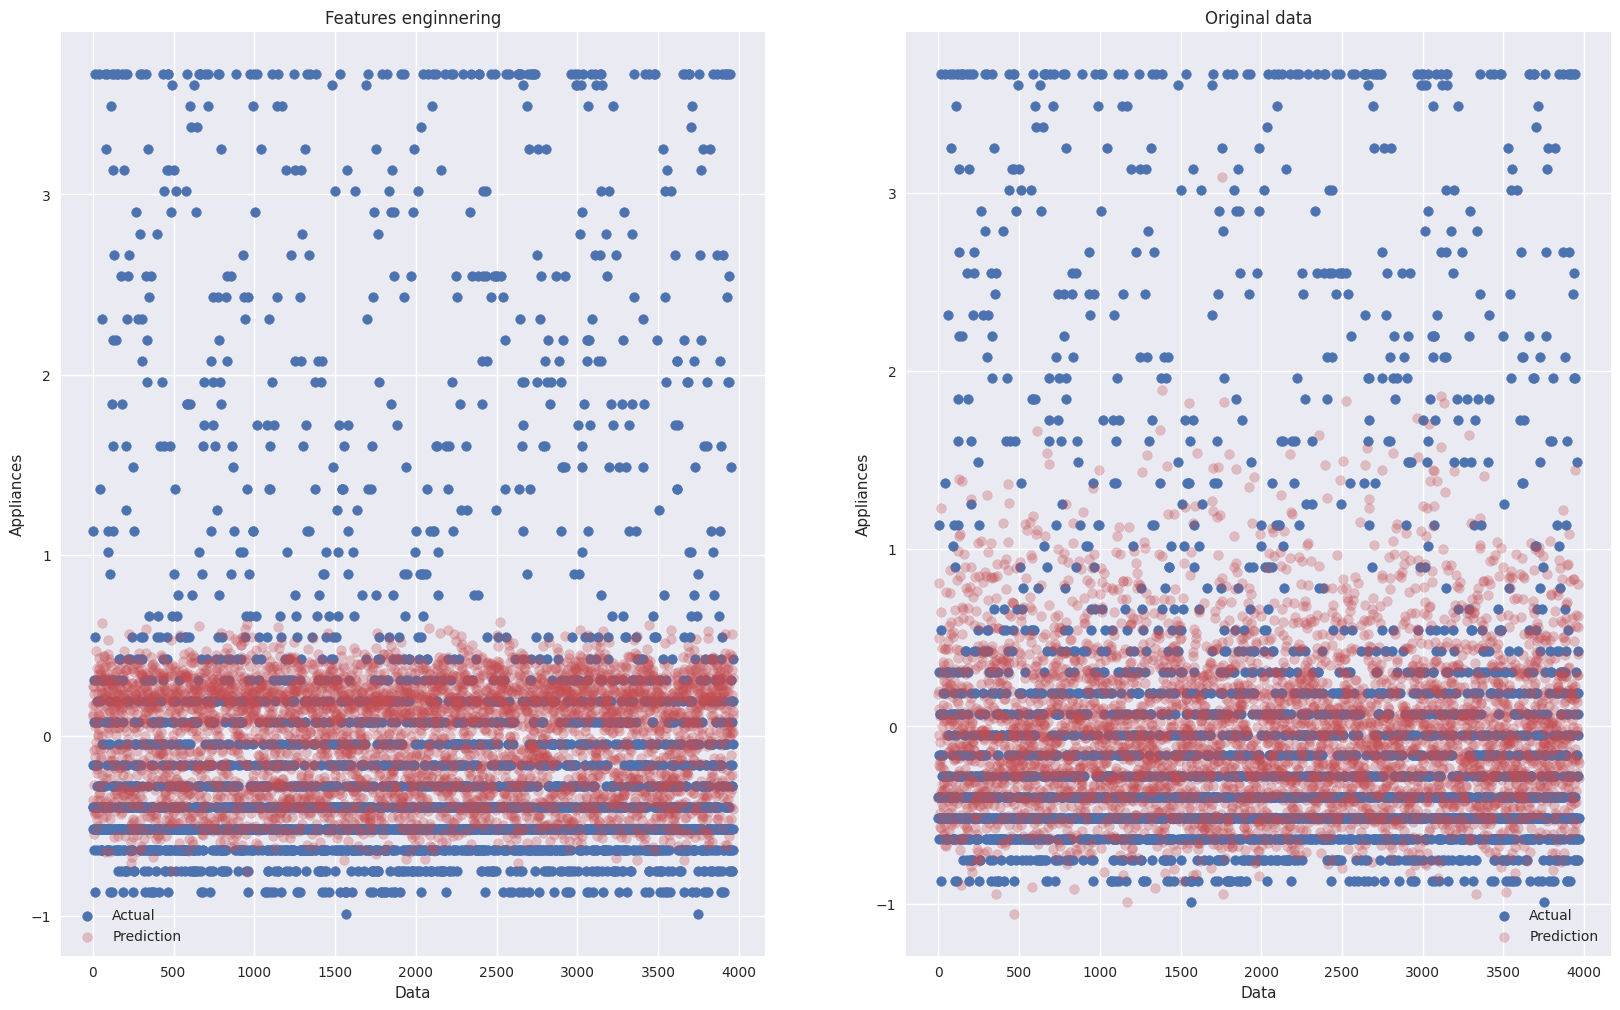

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

ax2.scatter(range(len(yo_test)), yo_test, color='b', label='Actual')
ax2.scatter(range(len(yo_test)), yo_pred, color='r', alpha=0.3, label='Prediction')
ax2.set_xlabel('Data')
ax2.set_ylabel('Appliances')
ax2.set_title('Original data')
ax2.legend()

ax1.scatter(range(len(y_test)), y_test, color='b', label='Actual')
ax1.scatter(range(len(y_test)), y_pred, color='r', alpha=0.3, label='Prediction')
ax1.set_xlabel('Data')
ax1.set_ylabel('Appliances')
ax1.set_title('Features enginnering')
ax1.legend()

plt.show()


In [49]:
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_1 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse1}")
print(f"R-squared: {r2_1}")

RMSE: 0.9255863237466126
R-squared: 0.08272362239846998


In [50]:
rmse2 = np.sqrt(mean_squared_error(yo_test, yo_pred))
r2_2 = r2_score(yo_test, yo_pred)

print(f"RMSE: {rmse2}")
print(f"R-squared: {r2_2}")

RMSE: 0.8682619811799938
R-squared: 0.192824593289177


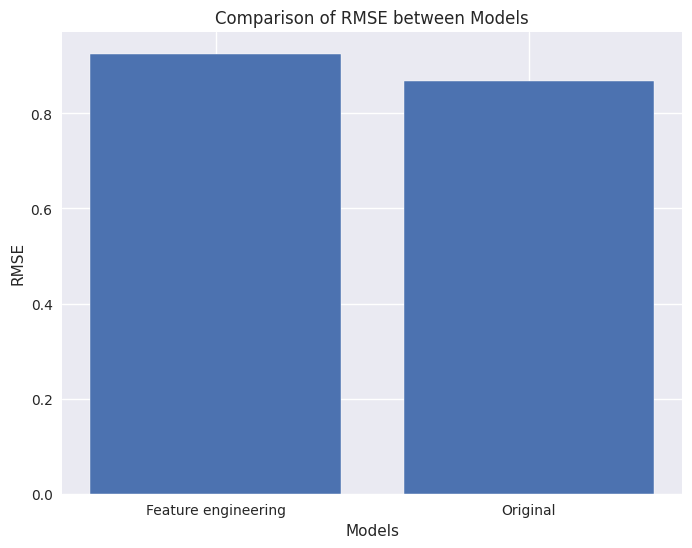

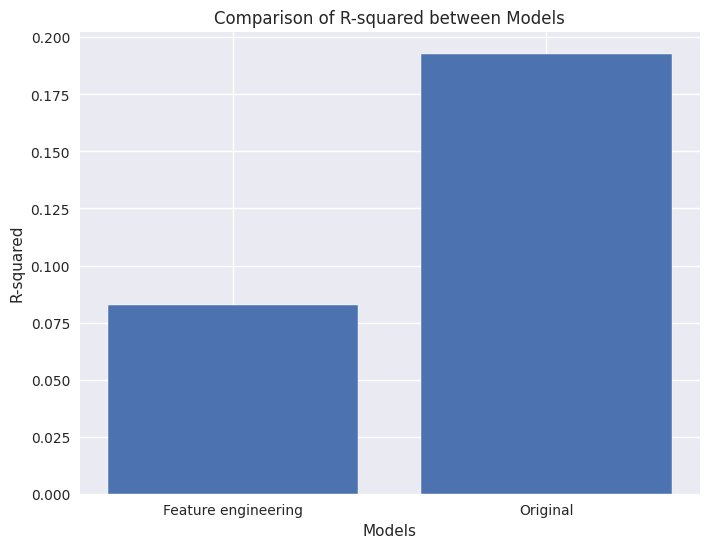

In [51]:
#Data RMSE i R-squared
rmse_values = [rmse1, rmse2]  
r2_values = [r2_1, r2_2]  
model_labels = ['Feature engineering', 'Original']  

# RMSE
plt.figure(figsize=(8, 6))
plt.bar(model_labels, rmse_values)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE between Models')
plt.show()

# R-squared
plt.figure(figsize=(8, 6))
plt.bar(model_labels, r2_values)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared between Models')
plt.show()

In [52]:
from sklearn.metrics import explained_variance_score

ev_score = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {ev_score}")


Explained Variance Score: 0.08346000886385485


In [53]:
ev_score_o = explained_variance_score(yo_test, yo_pred)
print(f"Explained Variance Score: {ev_score_o}")

Explained Variance Score: 0.19361121947385185


## Prediction Scores for both models 

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

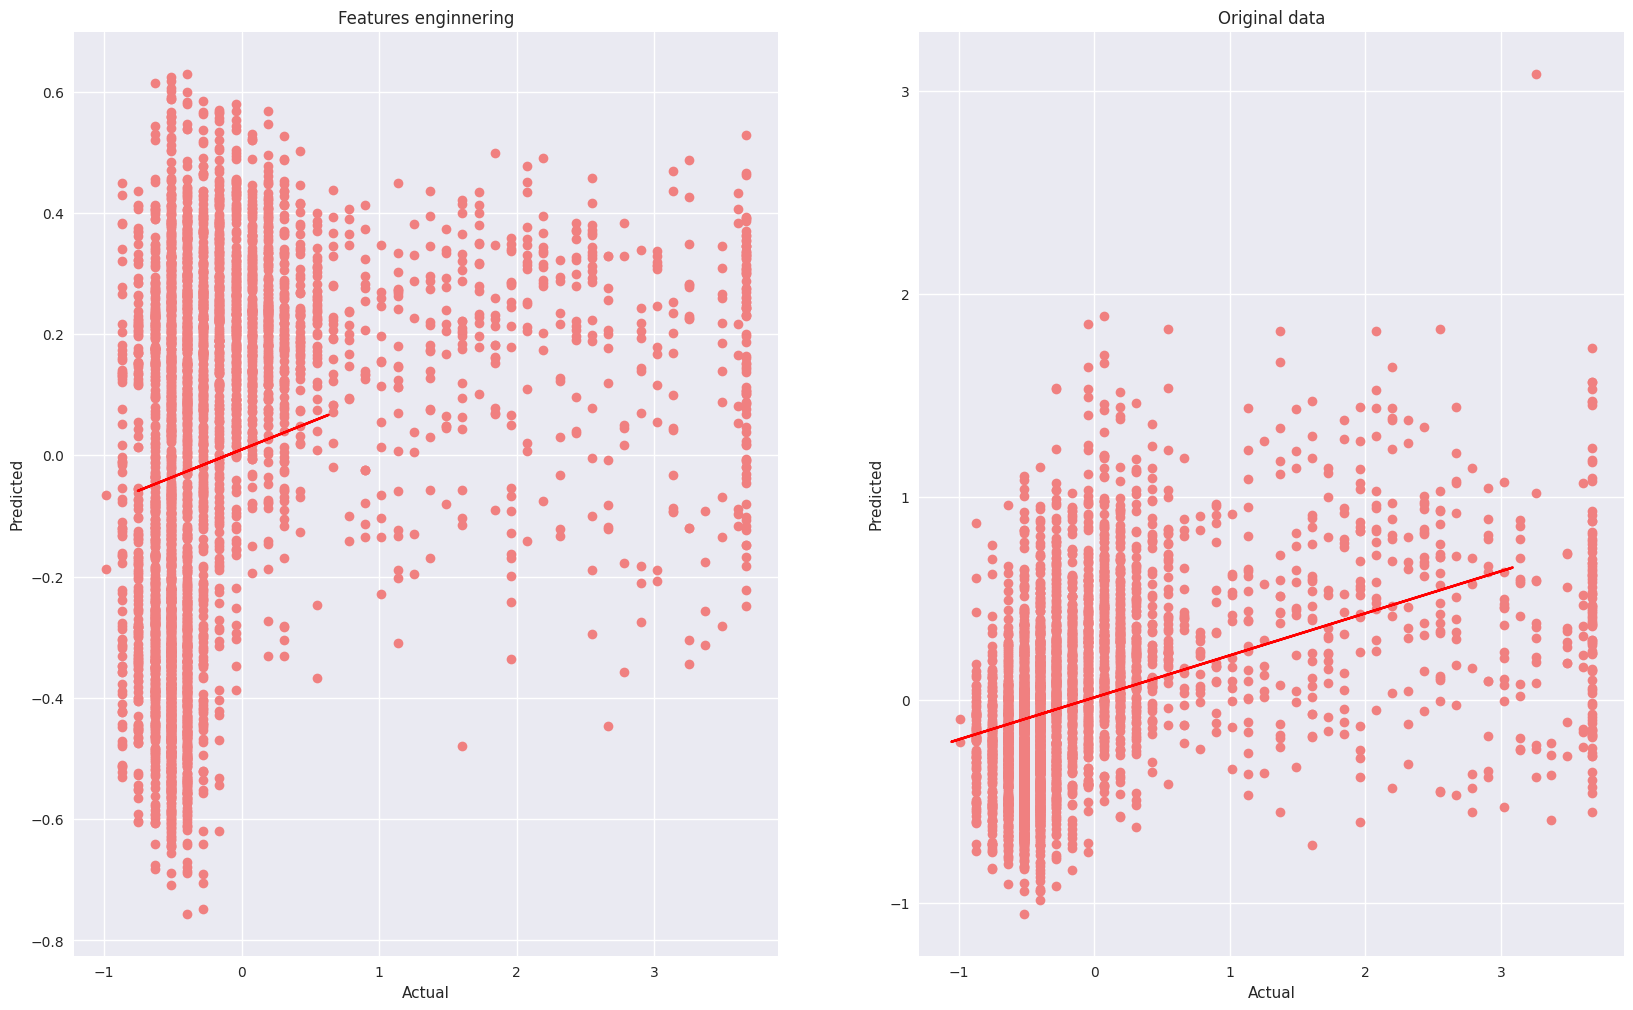

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

ax2.plot(yo_test,yo_pred,'o',color='#f08080')
m, b = np.polyfit(yo_test, yo_pred, 1)
ax2.plot(yo_pred, m*yo_pred+b, color='red')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title('Original data')


ax1.plot(y_test,y_pred,'o',color="#f08080")
n, c = np.polyfit(y_test, y_pred, 1)
ax1.plot(y_pred, (n*y_pred+c), color='red')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('Features enginnering')


plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0121ed5a-4bfb-4640-9389-b2abe40463b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>